# AirbnbPricePrediction

## Table of Contents
1. Project Preparation
   - 1.1 Defining the problem and project goals.
   - 1.2 Hypothesis

2. Data Preparation
   - 2.1 Imports
      - 2.1.1 Import libraries
      - 2.1.2 Import dataset
   - 2.2 Variable Identification and Analysis
      - 2.2.1 Initial Feature Selection
      - 2.2.2 Variable dependant/independant Identification
      - 2.2.3 Descriptive Statistics
      - 2.2.4 Visualization of Distributions
   - 2.3 Data Cleaning
      - 2.3.1 Remove duplicates
      - 2.3.2 Remove values errors
      - 2.3.3 Outliers Treatment
      - 2.3.4 Handle Missing Values
   - 2.4 Feature Selection
   - 2.5 Data Preprocessing
      - 2.5.1 Transformation
      - 2.5.2 Feature Engineering
         - 2.5.2.1 Creating New Features
         - 2.5.2.2 Feature Scaling
         - 2.5.2.3 Encoding Categorical Variables
            - 2.5.2.3.1 Ordinal Encoding
            - 2.5.2.3.2 One Hot Encoding
            - 2.5.2.3.3 Dummy Encoding
   - 2.6 Data Splitting (Train-Test-Validation)

3. Exploratory Data Analysis
   - 3.1 Univariate Analysis
   - 3.2 Bivariate Analysis
      - 3.2.1 Numerical-Numerical Variable
      - 3.2.2 Categorical-Numerical Variable

4. The model
   - 4.1 Model Building
   - 4.2 Model Training
   - 4.3 Model Evaluation
      - 4.3.1 K-Fold Cross Validation
      - 4.3.2 Hyperparameter Tunning
      - 4.3.3 Re-train with optimal hyperparameters for predictions
      - 4.3.4 Feature Importance
      - 4.3.5 Learning Curves
   - 4.4 Test the model on Test Set

5. Conclusion
   - 5.1 Results of the project / Validating hypothesis
   - 5.2 Improvements
   - 5.3 Conclusion on the project / course

## 1. Project Preparation
...
### 1.1 Defining the problem and project goals
...
### 1.2 Hypothesis
...


## 2. Data Preparation
...
### 2.1 Imports
#### 2.1.1 Import libraries

In [1091]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OrdinalEncoder

In [1092]:
pd.set_option('display.max_columns', None)

#### 2.1.2 Import dataset

In [1093]:
dataset = pd.read_csv('./data/airbnb-listings.csv', sep=";")

C:\Users\charp\AppData\Local\Temp\ipykernel_29728\511297216.py:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./data/airbnb-listings.csv', sep=";")


In [1094]:
dataset.sample(1)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
39327,16641126,https://www.airbnb.com/rooms/16641126,20170407214050,2017-04-08,Great place Jaume I,The Space Spacious apartment for a maximum of ...,NaN,The Space Spacious apartment for a maximum of ...,none,NaN,NaN,NaN,NaN,NaN,- No parties or smoking allowed. Behave as you...,https://a0.muscache.com/im/pictures/0d7a9bc5-7...,https://a0.muscache.com/im/pictures/0d7a9bc5-7...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/0d7a9bc5-7...,109961165,https://www.airbnb.com/users/show/109961165,John,2017-01-05,ES,NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/0b662ef3-f...,https://a0.muscache.com/im/pictures/0b662ef3-f...,NaN,1.0,1.0,"email,phone,reviews","Barcelona, Catalunya 08003, Spain",NaN,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Barcelona,Catalunya,08003,Barcelona,"Barcelona, Spain",ES,Spain,41.387776,2.180918,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,75.0,NaN,NaN,150.0,55.0,1.0,10.0,3.0,1125.0,today,NaN,9.0,9.0,16.0,16.0,2017-04-08,2.0,2017-01-09,2017-02-16,80.0,8.0,8.0,10.0,10.0,10.0,6.0,NaN,NaN,strict,1.0,0.67,"41.38777595186421, 2.1809181391560726","Host Has Profile Pic,Requires License,Instant ..."


### 2.2 Variable Identification and Analysis

In this section, we will have a look in our data. We will familiarize ourselves with it in order to understand the data we will be working with and identify those that could be useful in addressing our problem.

But what are our variables ?

In [1095]:
print(dataset.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

So, we have 89 variables in total.

In [1096]:
print(len(dataset.columns))

89


In this list, we can see the ID of the listing, we can use it as an index for our dataframe.

In [1097]:
dataset.set_index('ID', inplace=True)

#### 2.2.1 Initial Feature Selection

We have a lot of feature, but are all these data useful for predicting our dependent variables?

Certainly, the answer is obviously no. Which data is not useful to us and will therefore be removed later?
- Scraping data, which provides no relevant information about the accommodation.
- Various fields with URLs, which also do not contribute to our analysis.
- Here, we will not be performing NLP, so all attributes containing long text (such as description) will be removed as well
- Features irrelevant to our goal
- Redondant informations

We begin by removing features related to web scraping that are not directly associated with the dwelling. Scraping-related data may include information that does not significantly contribute to our analysis of the dwelling, and therefore, their presence could add noise rather than clarity to our dataset.

In [1098]:
dataset.drop(['Scrape ID', 'Last Scraped', 'Calendar last Scraped'], axis=1, inplace=True)

Next, let's remove features that are in the form of URLs, whether for images or links to other web pages.

In [1099]:
dataset.drop(['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'], axis=1, inplace=True)

The decision to remove the following attributes was made to simplify our dataset. These attributes contain long and detailed textual information for which more advanced processing, such as Natural Language Processing (NLP), would be necessary.

If our model does not perform optimally, it might be possible to leverage these attributes to add additional features to our dataset. However, since the messages do not follow a predefined structure, extracting specific information for one property may be feasible, but it does not guarantee finding the same information in the same field for another property. So, the data retrieved from these fields could lead to the creation of attributes with a significant amount of missing values.

// TODO: Use 'House Rules' to extract information about smoking policy.

In [1100]:
dataset.drop(['Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules'], axis=1, inplace=True)

Then, I decided to remove attributes that I consider irrelevant to address our problem. These attributes are mainly categorical, and preserving them would have required specific encodings, resulting in the creation of a significant number of features and substantially increasing the dimensionality of our dataset, without providing meaningful information to predict our price values. Indeed, almost all these attributes have unique values.

It's important to note that the ``Features`` attribute corresponds to a consolidation of several attributes related to the host that I have chosen to retain. Consequently, this attribute has become unnecessary.

In [1101]:
dataset.drop(['Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Features'], axis=1, inplace=True)

I also decided to remove all information regarding the location of the dwelling, except for ``longitude`` and ``latitude``. Using these two coordinates, it is possible to retrieve all the information that I am going to drop just below, such as the country, etc.

If I had kept this information, it would have created redundancy in the data. Because, we can find all the informations drop with only these two values. Additionally, it would have been necessary to encode this information using an One Hot Encoder, significantly increasing the dimensionality of our dataset. It is noteworthy that the ``Geolocation`` attribute is actually a combination of the ``Latitude`` and ``Longitude`` attributes.

In [1102]:
dataset.drop(['Street', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Geolocation'], axis= 1, inplace=True)

It finally leaves us with the following attributes:

In [1103]:
print(dataset.columns)

Index(['Experiences Offered', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Calendar Updated', 'Has Availability', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')


We went from 89 features to 45.

In [1104]:
len(dataset.columns)

45

#### 2.2.2 Variable dependant/independant Identification

Now that we've completed an initial quick cleaning, we can start by identifying which variables are dependent and independent among all the variables available.

To address our problem, we aim to predict the folowing variables (dependant variables) :
- ``Price`` 
- ``Weekly Price``  
- ``Monthly Price`` 

All others correspond to the independant variables that can be used to predict our dependent variables.

In [1105]:
dependant_variables = ['Price', 'Weekly Price', 'Monthly Price']
independant_variables = [var for var in dataset.columns if var not in dependant_variables]

In [1106]:
print(f'Dependant variables : {dependant_variables}')
print(f'Independant variables : {independant_variables}')

Dependant variables : ['Price', 'Weekly Price', 'Monthly Price']
Independant variables : ['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month']


So, we have 3 values to predict, and we will utilize 42 features for the prediction.

In [1107]:
len(dependant_variables)

3

In [1108]:
len(independant_variables)

42

#### 2.2.3 Descriptive Statistics

Now, we can examine the types of variables, whether they are numerical, categorical, or if they have null values, to guide our preprocessing/cleaning and analysis decisions. Here, we will seek to gather more information about our data, gaining a broader overview of our data.

In [1109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494954 entries, 6017649 to 10562264
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Experiences Offered             494954 non-null  object 
 1   Host Since                      494449 non-null  object 
 2   Host Response Time              379885 non-null  object 
 3   Host Response Rate              379884 non-null  float64
 4   Host Acceptance Rate            42258 non-null   object 
 5   Host Listings Count             494449 non-null  float64
 6   Host Total Listings Count       494448 non-null  float64
 7   Host Verifications              494114 non-null  object 
 8   Latitude                        494953 non-null  float64
 9   Longitude                       494953 non-null  float64
 10  Property Type                   494943 non-null  object 
 11  Room Type                       494953 non-null  object 
 12  Accommodates 

For each variable, we can seek to determine whether it is a numerical or categorical variable. This information is crucial in determining which pre-treatment and analysis methods are appropriate for each variable.

In [1110]:
qualitative_columns = dataset.select_dtypes(include='object').columns
quantitative_columns = dataset.select_dtypes(include='number').columns

print("Qualitative (categorical)")
for feat in qualitative_columns:
    print(' - ', feat)
    
print("Quantitative (numerical)")
for feat in quantitative_columns:
    print(' - ', feat)

Qualitative (categorical)
 -  Experiences Offered
 -  Host Since
 -  Host Response Time
 -  Host Acceptance Rate
 -  Host Verifications
 -  Property Type
 -  Room Type
 -  Bed Type
 -  Amenities
 -  Calendar Updated
 -  Has Availability
 -  Cancellation Policy
Quantitative (numerical)
 -  Host Response Rate
 -  Host Listings Count
 -  Host Total Listings Count
 -  Latitude
 -  Longitude
 -  Accommodates
 -  Bathrooms
 -  Bedrooms
 -  Beds
 -  Square Feet
 -  Price
 -  Weekly Price
 -  Monthly Price
 -  Security Deposit
 -  Cleaning Fee
 -  Guests Included
 -  Extra People
 -  Minimum Nights
 -  Maximum Nights
 -  Availability 30
 -  Availability 60
 -  Availability 90
 -  Availability 365
 -  Number of Reviews
 -  Review Scores Rating
 -  Review Scores Accuracy
 -  Review Scores Cleanliness
 -  Review Scores Checkin
 -  Review Scores Communication
 -  Review Scores Location
 -  Review Scores Value
 -  Calculated host listings count
 -  Reviews per Month


Here, we observe several issues that we'll need to investigate to understand why certain fields, initially considered numerical, end up being categorical. Consequently, there are operations to be performed.

For instance, the ``Host Acceptance Rate`` attribute should be numerical rather than categorical.

Additionally, I would like to transform certain categorical attributes into numerical ones. This is particularly the case for:
- ``Host Response Time``: I would like to represent it, for example, as a number of days or hours.
- ``Host Since``: I aim to represent it also as a number of days.
- ``Calendar Updated``: I would also like to represent it as a number of days.
- ``Has Availability``: I want this to be a boolean attribute, taking the value True (1) if available and False (0) if not available.

Thus, transforming these categorical attributes into numerical ones will reduce the number of features in our encoded dataset and consequently the dataset's dimensionality, enhancing computational efficiency. Numerical features are often more suitable for machine learning models, improving interpretability and generalization performance.

So, it will be only necessary to encode the following attributes: 
 -  ``Experiences Offered``
 -  ``Host Verifications``
 -  ``Property Type``
 -  ``Room Type``
 -  ``Bed Type``
 -  ``Amenities``
 -  ``Cancellation Policy``

But before attempting to encode these categorical variables, let's examine the number of unique values for each one.

In [1111]:
unique_value_counts = []
for variable in ['Experiences Offered', 'Host Verifications', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy']:
    unique = dataset[variable].unique()
    print(f"Number of unique values for '{variable}': {len(unique)}")
    if len(unique) < 15:
        print(f' -> All values : {unique}')
    else:
        print(f'- Exemple of value : {unique[1]}')
    unique_value_counts.append((variable, len(unique)))

Number of unique values for 'Experiences Offered': 6
 -> All values : ['none' 'business' 'social' 'romantic' 'family' '1']
Number of unique values for 'Host Verifications': 1055
- Exemple of value : email,phone,reviews,jumio,government_id
Number of unique values for 'Property Type': 46
- Exemple of value : Bed & Breakfast
Number of unique values for 'Room Type': 5
 -> All values : ['Private room' 'Entire home/apt' 'Shared room' '9' nan]
Number of unique values for 'Bed Type': 7
 -> All values : ['Real Bed' 'Pull-out Sofa' 'Airbed' 'Futon' 'Couch' '9' nan]
Number of unique values for 'Amenities': 381634
- Exemple of value : TV,Cable TV,Internet,Wireless Internet,Kitchen,Buzzer/wireless intercom,Heating,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
Number of unique values for 'Cancellation Policy':

And what if we tried to visualize it?

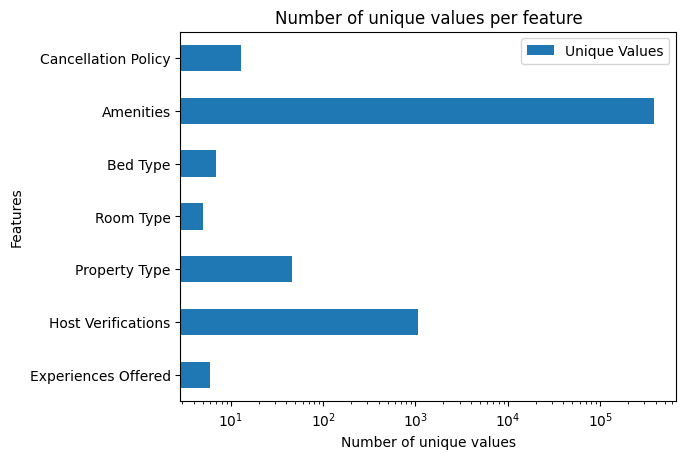

In [1112]:
unique_counts_df = pd.DataFrame(unique_value_counts, columns=['Feature', 'Unique Values'])
unique_counts_df.plot(kind='barh', x='Feature', y='Unique Values')
plt.xlabel('Number of unique values')
plt.ylabel('Features')
plt.title('Number of unique values per feature')
plt.xscale('log')
plt.show()


One must be cautious in interpreting this graph, which uses a logarithmic scale on the x-axis.

Here, we can observe numerous unique values for each of our categorical features. It is impractical to perform a One Hot Encoder on Amenities.

We will need to try to reduce these unique values by either merging values that represent the same thing or grouping together values that appear less frequently into another values such as 'Others'.

Furthermore, the previous prints have shown the presence of incorrect values that need to be addressed.

Some attributes that we will study later will require additional processing to reduce the number of unique values. This is notably the case for ``Host Verifications`` and ``Amenities``, where each value is actually separated by commas, generating a very large number of unique combinations.

We can look to spot potential issues such as missing values, outliers, or inconsistencies in the data we have before using some plots, using only the summary statistics on numerical features. 

In [1113]:
dataset.describe()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,379884.000000,494449.000000,494448.000000,494953.000000,494953.000000,494891.000000,493428.000000,494328.000000,494037.000000,12209.000000,486996.000000,97747.000000,96091.000000,204012.000000,315715.000000,494952.000000,494917.000000,494952.000000,4.949520e+05,494952.000000,494952.000000,494952.000000,494952.000000,494952.000000,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,494087.000000,372947.000000
mean,93.376549,9.549721,9.549738,38.042292,-15.020974,3.311584,1.249632,1.378322,1.934525,575.544762,138.072703,493.650127,2961.696277,274.126703,62.267906,1.550235,12.028728,3.470415,2.123406e+05,9.961726,22.997256,37.878594,166.092332,16.740850,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,6.869659,1.479523
std,17.592441,57.199523,57.199579,22.941429,70.364294,2.094052,0.607029,0.942508,1.488128,1825.903405,149.670499,215.538103,4688.495984,171.605763,75.746943,1.224923,31.189786,89.396359,2.024385e+07,10.981093,22.351102,33.856420,140.510625,32.336701,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,41.977381,1.731931
min,0.000000,0.000000,0.000000,-38.224427,-123.218712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,98.000000,1.000000,1.000000,38.913119,-73.969216,2.000000,1.000000,1.000000,1.000000,0.000000,55.000000,320.000000,1178.500000,150.000000,20.000000,1.000000,0.000000,1.000000,3.200000e+01,0.000000,0.000000,0.000000,14.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,100.000000,1.000000,1.000000,42.310894,2.137584,2.000000,1.000000,1.000000,1.000000,377.000000,90.000000,475.000000,1840.000000,200.000000,40.000000,1.000000,0.000000,2.000000,1.125000e+03,5.000000,17.000000,33.000000,148.000000,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.880000
75%,100.000000,3.000000,3.000000,51.375424,12.444849,4.000000,1.000000,2.000000,2.000000,800.000000,150.000000,650.000000,3000.000000,350.000000,75.000000,2.000000,15.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,313.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.030000
max,100.000000,1114.000000,1114.000000,55.994889,153.637837,21.000000,10.000000,96.000000,19.000000,129167.000000,999.000000,999.000000,280016.000000,999.000000,999.000000,20.000000,999.000000,60000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000


#### 2.2.4 Visualization of distributions
We can now try to visualise the distributions of our various features. These initial visualizations will help us to identify potential errors in the data that require treatment, transformations, as well as pinpoint any outliers. Moreover, following our data preparation, we will conduct a more comprehensive Exploratory Data Analysis (EDA) using the actual values that will be utilized for our model.

Let's start by examining the distribution of our categorical variables.

In [1114]:
print(qualitative_columns)

Index(['Experiences Offered', 'Host Since', 'Host Response Time',
       'Host Acceptance Rate', 'Host Verifications', 'Property Type',
       'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated',
       'Has Availability', 'Cancellation Policy'],
      dtype='object')


Here, I have decided not to display the distribution of the Amenities feature with the others because it has many unique values, and consequently, it takes a significant amount of time to display this graph. Moreover, this graph won't provide us with substantial information. However, we can still inspect the unique values present in this field for a quick check.

In [1115]:
print(len(dataset['Amenities'].unique()))
print(dataset['Amenities'].unique())

381634
['Internet,Wireless Internet,Kitchen,Heating,Washer,Essentials'
 'TV,Cable TV,Internet,Wireless Internet,Kitchen,Buzzer/wireless intercom,Heating,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50'
 'TV,Internet,Wireless Internet,Breakfast,Heating,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo'
 ...
 'TV,Internet,Wireless Internet,Kitchen,Pets live on this property,Cat(s),Buzzer/wireless intercom,Heating,Washer,Hangers,Hair dryer,Iron,Laptop friendly workspace'
 'TV,Cable TV,Internet,Wireless Internet,Buzzer/wireless intercom,Heating,Smoke detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50'
 'Wireless Internet,Kitchen,Elevator in building,Heating,F

Here, we can observe that each amenity is separated by a comma. Numerous combinations of amenities are possible, which is why we have a large number of unique amenity combinations. However, it's common to find the same amenity repeated between different combinations, such as the case with the TV. It would be feasible to visualize the count of each amenity after transforming this field.

In [1116]:
all_amenities = dataset['Amenities'].str.split(',').explode()
amenity_counts = pd.Series(all_amenities).value_counts()
print(amenity_counts)

Amenities
Wireless Internet            463880
Kitchen                      452736
Heating                      439634
Essentials                   421224
Washer                       363476
                              ...  
Paid Parking Off Premises        13
Free Parking on Street            9
Beachfront                        5
9                                 1
Other                             1
Name: count, Length: 136, dtype: int64


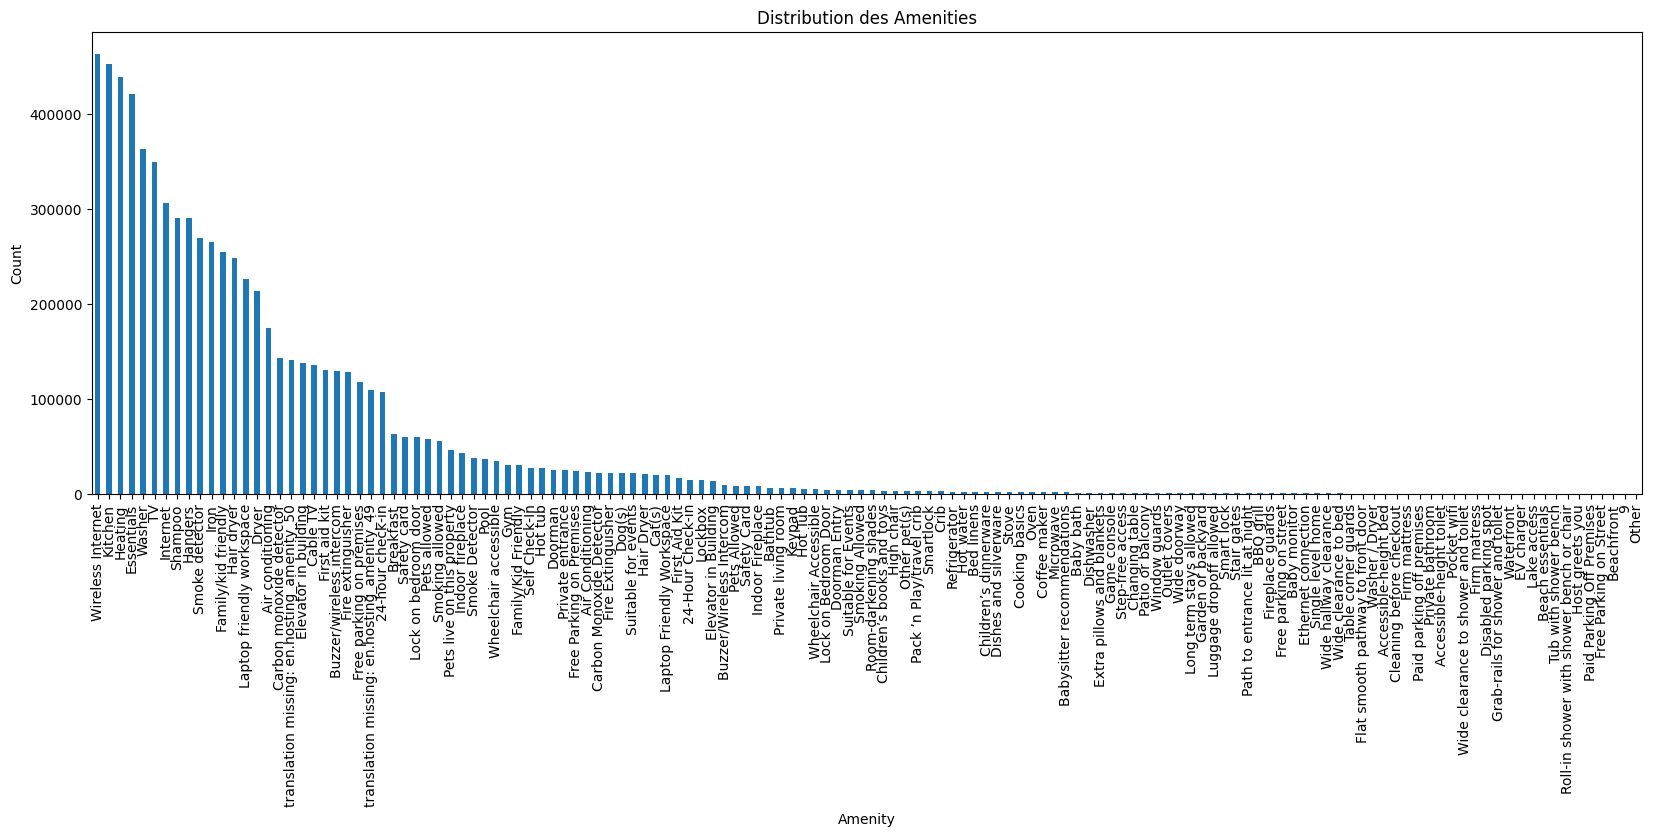

In [1117]:
plt.figure(figsize=(20, 6))
amenity_counts.plot(kind='bar')
plt.title('Distribution des Amenities')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.show()

Here, we can observe that there are actually 136 different amenities, which will need to be encoded using a One Hot Encoder. However, to reduce the future size of our dataset, it would be wise to group several amenities together. That's why it would be sensible to retain the 27 features that occur most frequently. I decided to choose 27 because there are two main tiers of amenity occurrences (one at 16 features and the other at 27). I didn't choose the first tier at 16 features because the features between the 16th and the 27th are still quite numerous (1/5 of the complete dataset). We will need to subsequently group all the other amenities into a single category, for example, 'Other'.

Similar to the Amenities attribute, the Host Verifications attribute has many unique values because the verification methods are also separated by commas.

In [1118]:
print(len(dataset['Host Verifications'].unique()))
print(dataset['Host Verifications'].unique())

1055
['email,phone,facebook,reviews' 'email,phone,reviews,jumio,government_id'
 'email,phone,reviews' ...
 'email,phone,facebook,amex,reviews,jumio,kba,government_id,work_email'
 'email,phone,reviews,manual_offline,kba,work_email'
 'email,phone,facebook,google,amex,kba']


So, I tried to study the distribution of these verification methods on the same principle as the Amenities.

In [1119]:
all_host_verification = dataset['Host Verifications'].str.split(',').explode()
host_verification_counts = pd.Series(all_host_verification).value_counts()
print(host_verification_counts)

Host Verifications
phone                         490113
email                         474496
reviews                       437318
jumio                         251122
facebook                      117589
government_id                  68998
kba                            51825
work_email                     36125
google                         26284
offline_government_id          19616
linkedin                       14663
manual_offline                 13903
manual_online                   4376
selfie                          2645
identity_manual                 2366
amex                            1825
sent_id                          949
weibo                            572
sesame_offline                   173
sesame                           173
photographer                      76
{TV                                1
"Cable TV"                         1
Internet                           1
"Wireless Internet"                1
Kitchen                            1
"Buzzer/wireless in

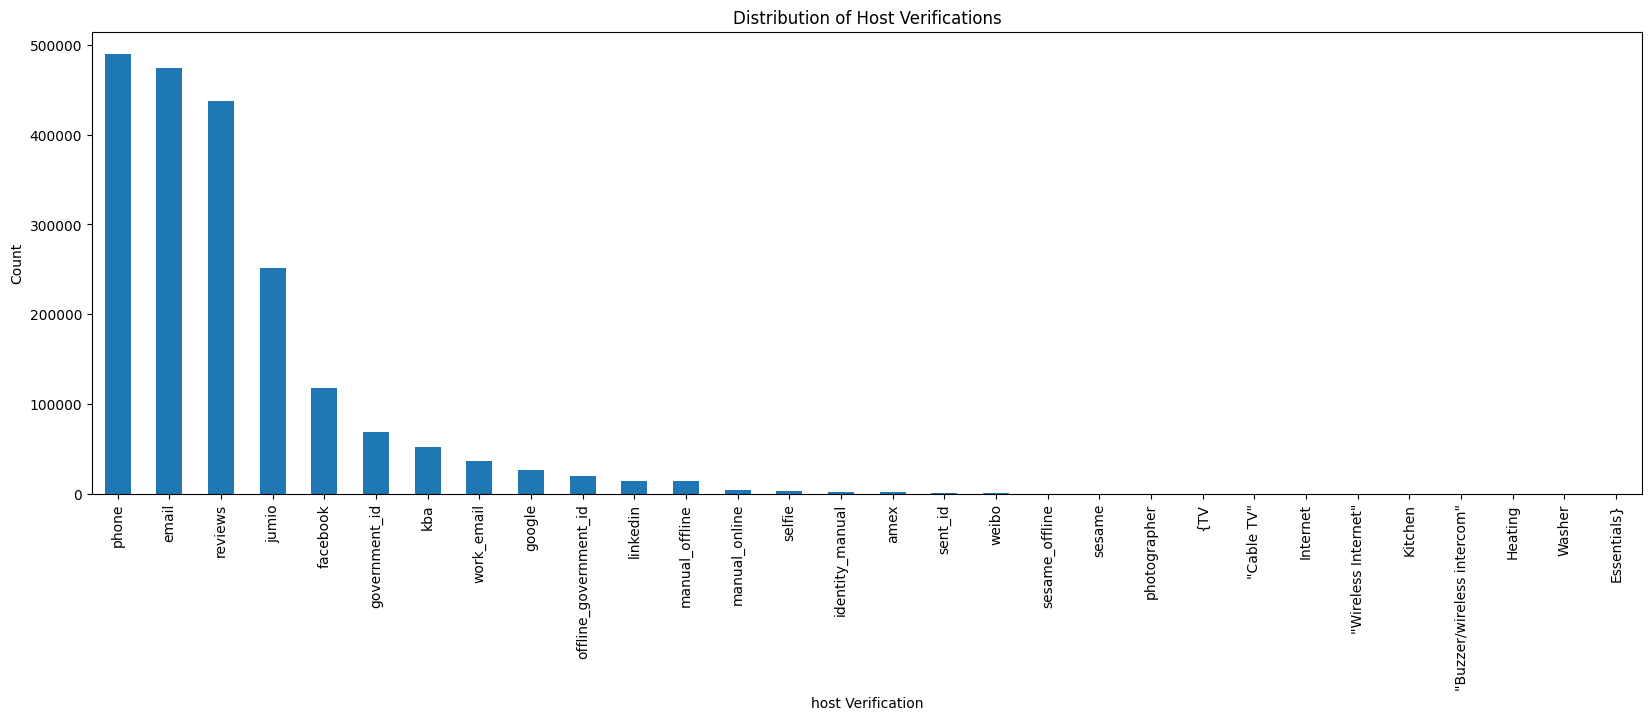

In [1120]:
plt.figure(figsize=(20, 6))
host_verification_counts.plot(kind='bar')
plt.title('Distribution of Host Verifications')
plt.xlabel('host Verification')
plt.ylabel('Count')
plt.show()

Here, we can observe that the main host verification methods number only 5. We could then group all the other values into a single 'Other' value, similar to Amenities, to reduce the dimensionality of the dataset after applying a OneHotEncoder.

I have also decide to not display directly the Host Since attributs with the others, because it has also a lot of unique values (3128) and so we won't see a lot of things on the graphe.

In [1121]:
print(len(dataset['Host Since'].unique()))
print(dataset['Host Since'].unique())

3130
['2011-09-22' '2015-10-31' '2012-10-17' ... '2008-05-26' '2008-08-26'
 '2009-06-22']


It's completely useless to want to encode it with a One Hot Encoder. Instead, it will be necessary to count the number of days since this listing has been hosted. So, we will transform a categorical variable into a numerical one. This will significantly reduce the dimensionality compared to using One Hot Encoding.

We can now check the distribution of all the other categorical variables.

In [1122]:
def display_distribution_categorical(col_name):
    plt.figure(figsize=(12, 6))
    dataset[col_name].value_counts(dropna=False).sort_values().plot(kind='bar')
    plt.title(f'Distribution of {col_name}')
    plt.xlabel('Count')
    plt.ylabel(col_name)
    plt.show()

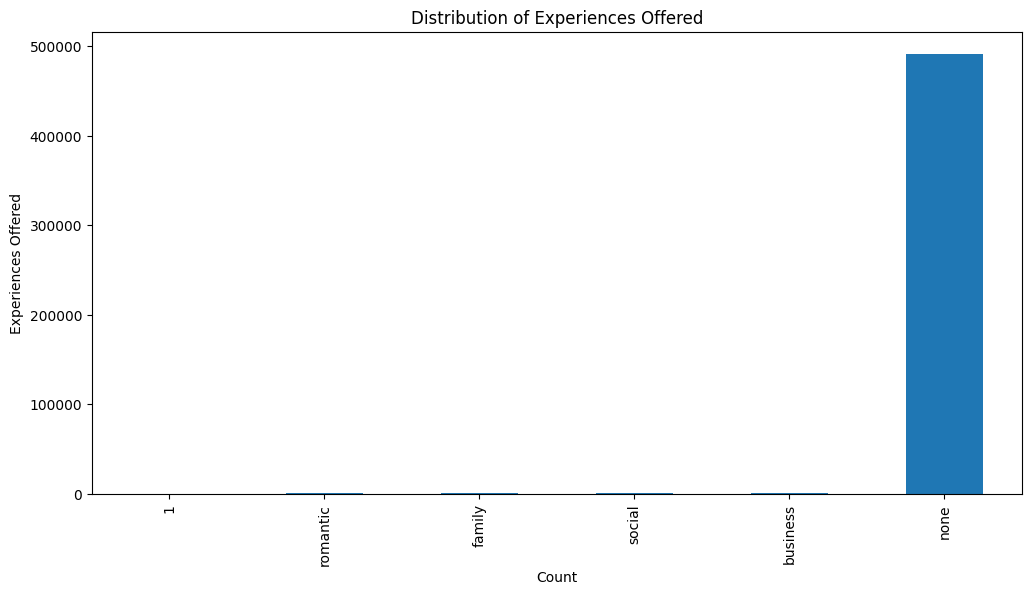

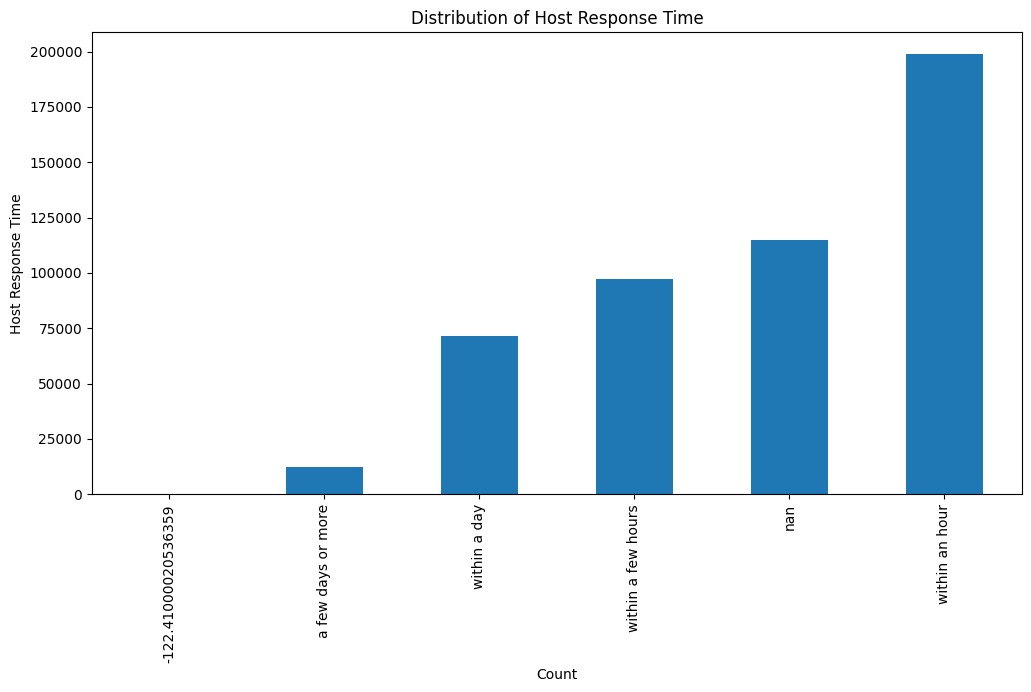

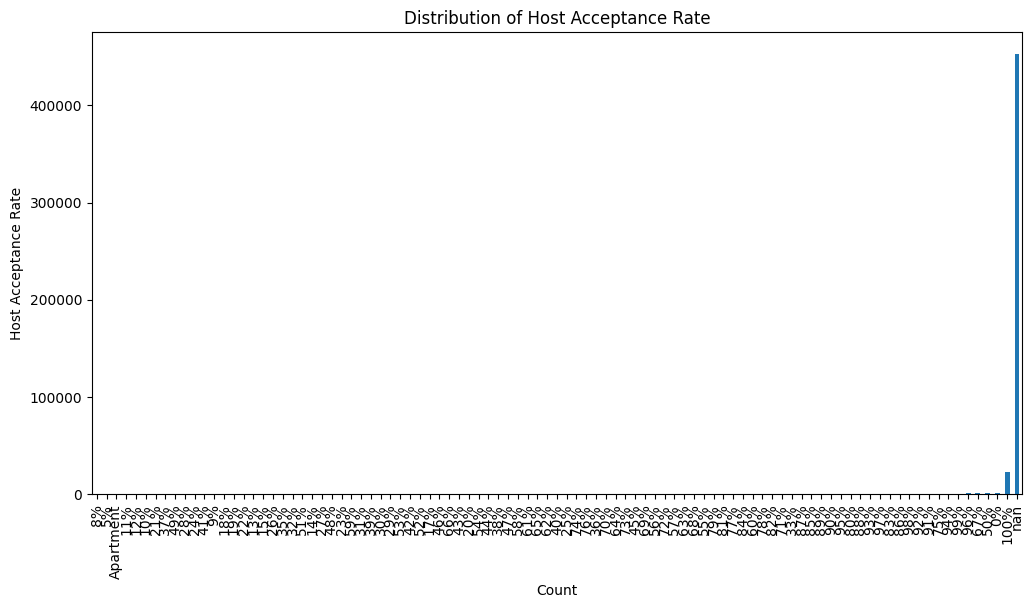

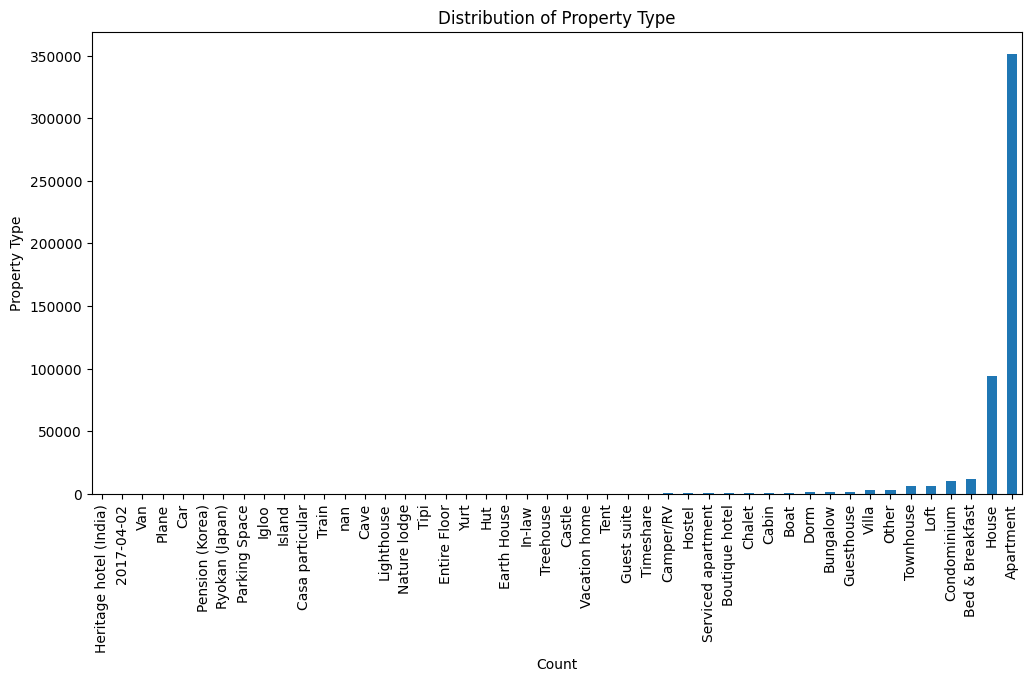

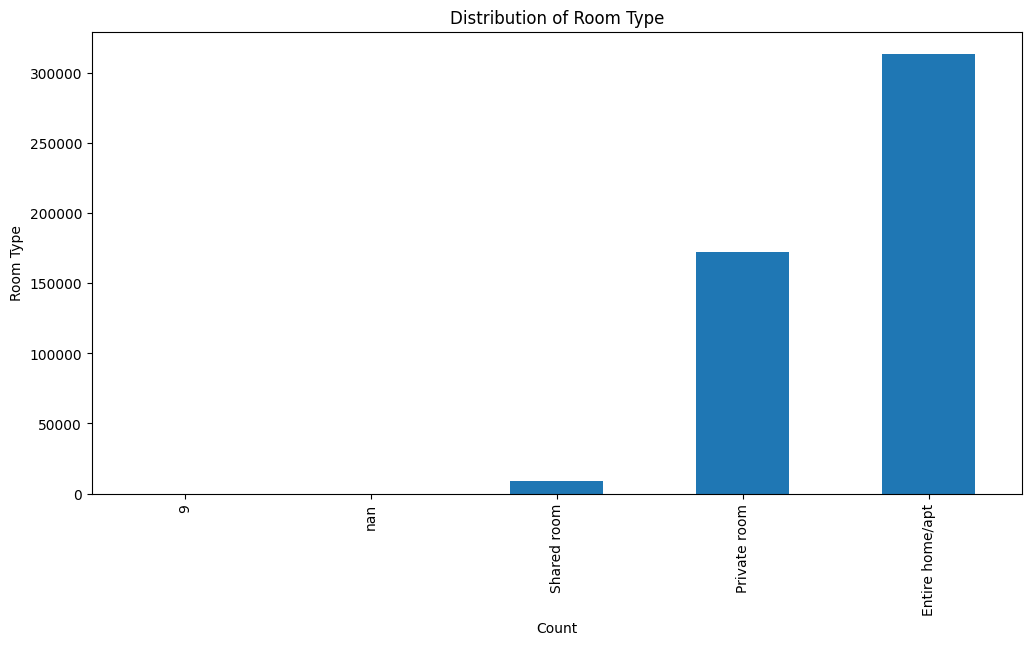

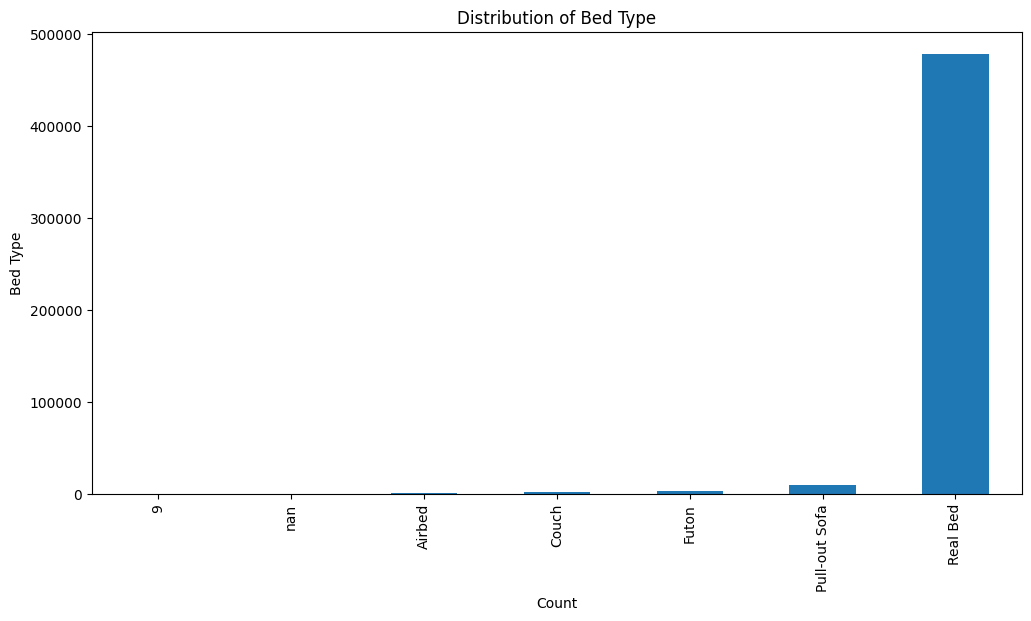

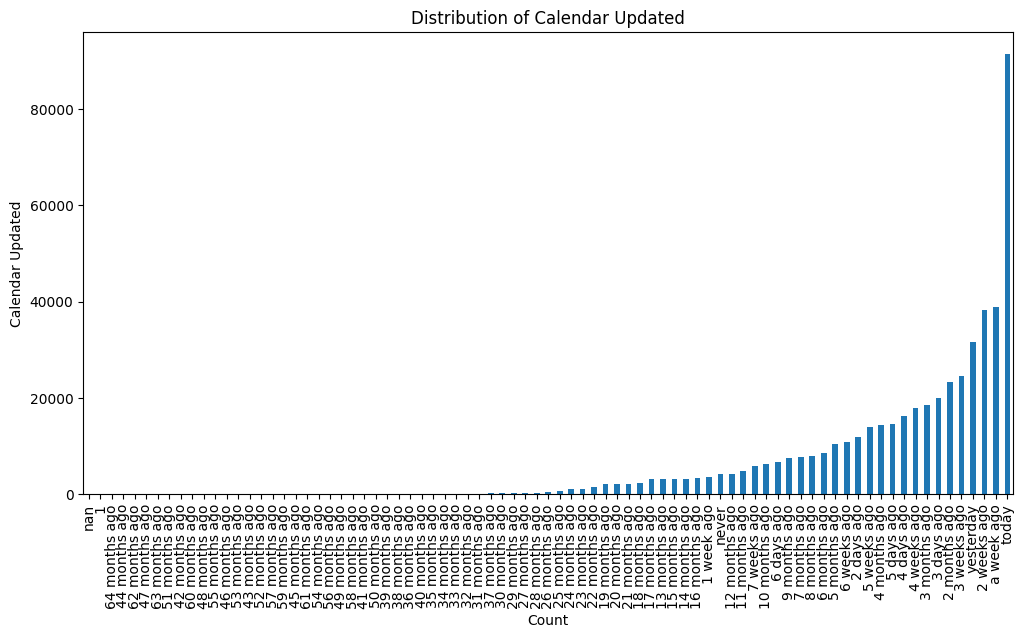

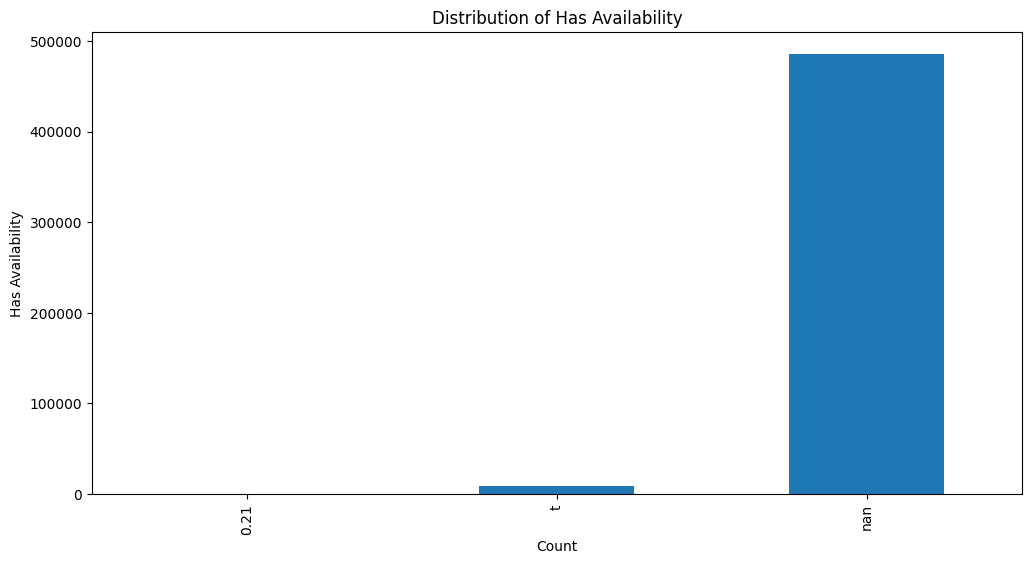

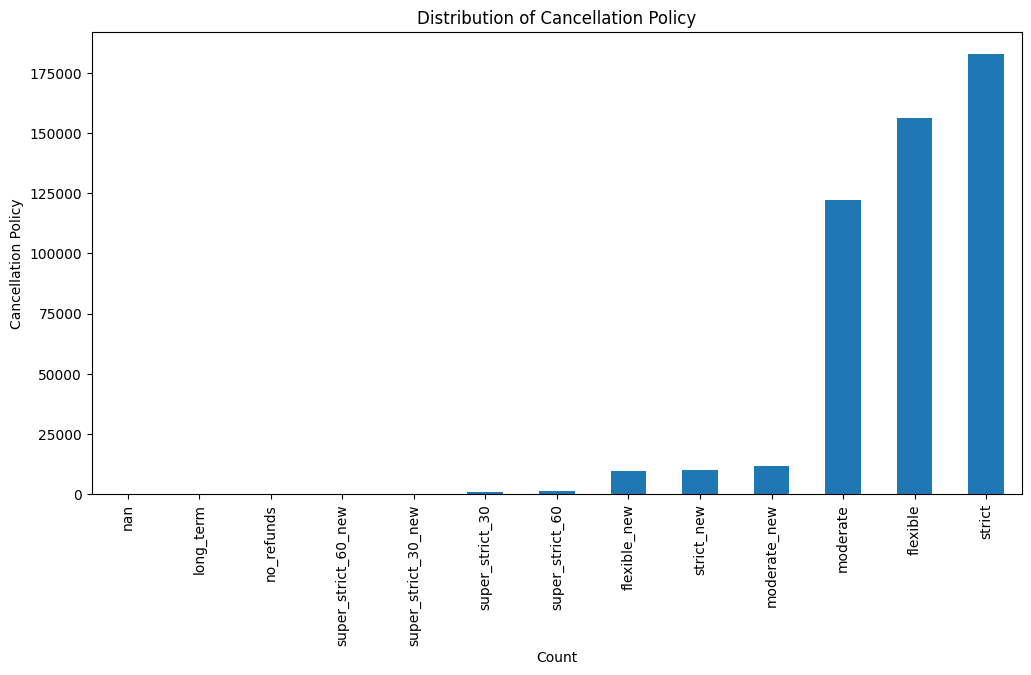

In [1123]:
for column in np.delete(qualitative_columns, np.where((qualitative_columns == "Amenities") | (qualitative_columns == "Host Since") | (qualitative_columns == "Host Verifications"))):
    display_distribution_categorical(column)

Thanks to these graphs, we can identify several problems of value errors and pinpoint certain transformations that we need to apply to our data:

- Experience Offered: some data contains the value "1," which is different from the others.
- Host Response Time: one of the possible values is -122.41, while all the others have string values. Furthermore, in this case, a negative value makes no sense.
- Host Acceptance Rate: We have the value "Apartment," which differs from the others expressed as a percentage, such as 38%. We will also need to transform this data to remove the "%" character and convert this categorical feature into a numerical one, not to encode it later.
- Property Type: Here, there is a value that is a date "2017-04-02." We could also limit the number of values to only the two most common ones, which are "Apartment" and "House," to reduce the dimensionality of the dataset after using encoding. Note that some values are derivatives of these two values; we could then modify their values to the most common ones. The others could be hidden under the term 'Other.'
- Room Type: We have the value "9," which differs from the others.
- Bed Type: We have the value "9," which differs from the others.
- Calendar Update: We have the value "1." Moreover, it would be conceivable to convert this attribute into a numeric attribute by counting the number of days instead of having a categorical attribute.
- Cancellation Policy: It is possible to group all the values into only "moderate," "flexible," "strict," thereby reducing the number of values to encode. It would be possible here to encode it with a hierarchy of values. Strict, for example, is stronger than moderate, which is stronger than flexible.

I then decided to set these values to null so that they are considered as missing values. Values will be imputed in their place soon.

We can now turn our attention to the distribution of our numerical variables.

In [1124]:
print(quantitative_columns)

Index(['Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month'],
      dtype='object')


In [1125]:
def display_distribution_numerical(col_name):
    fig, axs = plt.subplots(
        nrows=1, 
        ncols=2, 
        figsize=(12, 3)
    )
    sb.boxplot(x=dataset[col_name].dropna(), 
           showmeans = True, 
           ax=axs[0]
           )
    axs[0].set_title(f'Boxplot of "{col_name}" variable')

    sb.histplot(
        dataset[col_name].dropna(),
        bins=20, 
        ax=axs[1]
        )
    axs[1].set_title(f'Histogram of "{col_name}" variable')

    plt.tight_layout()
    plt.show()

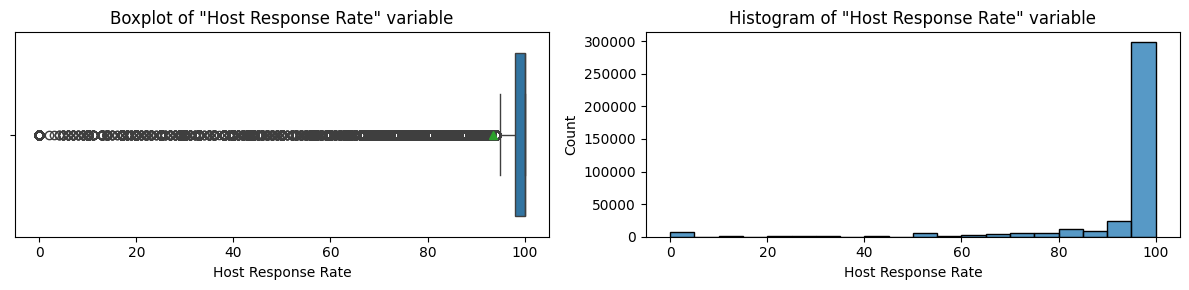

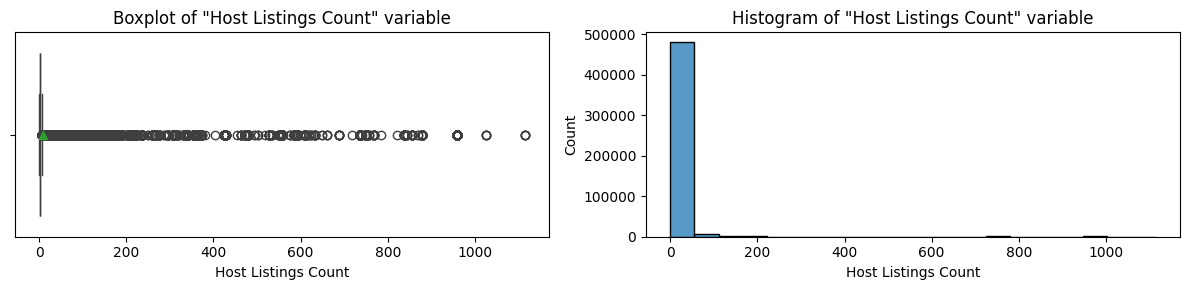

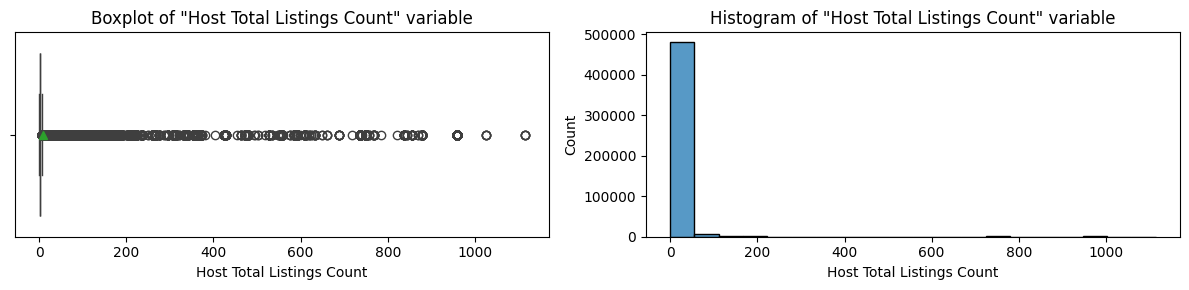

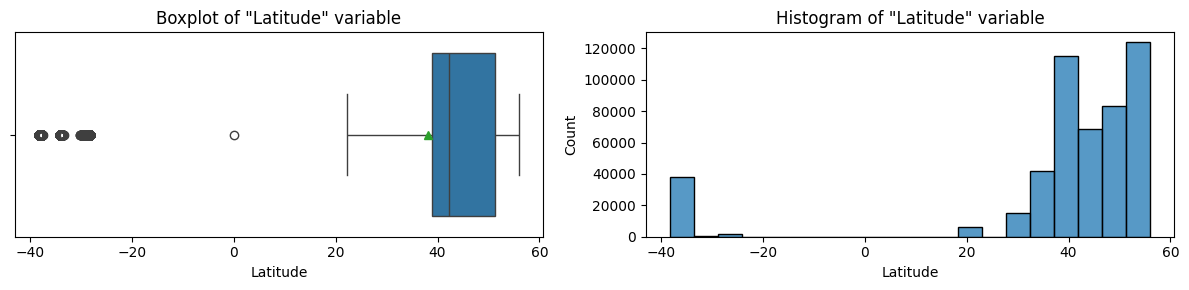

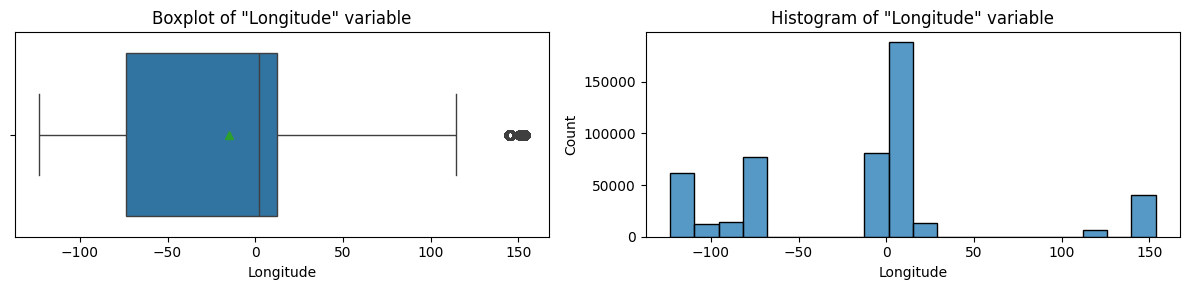

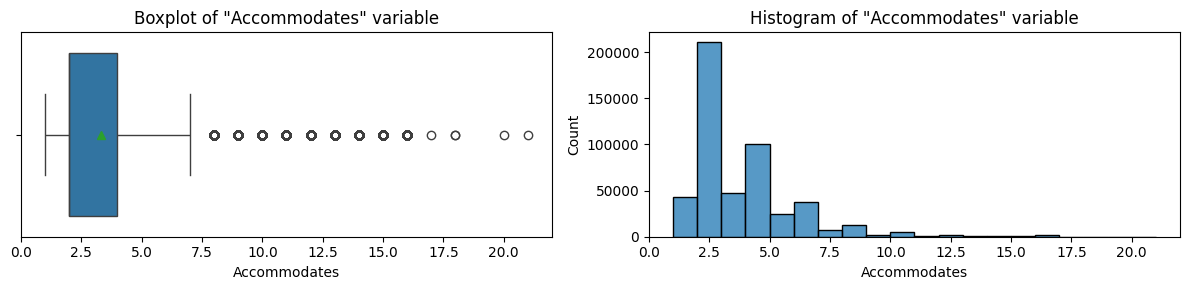

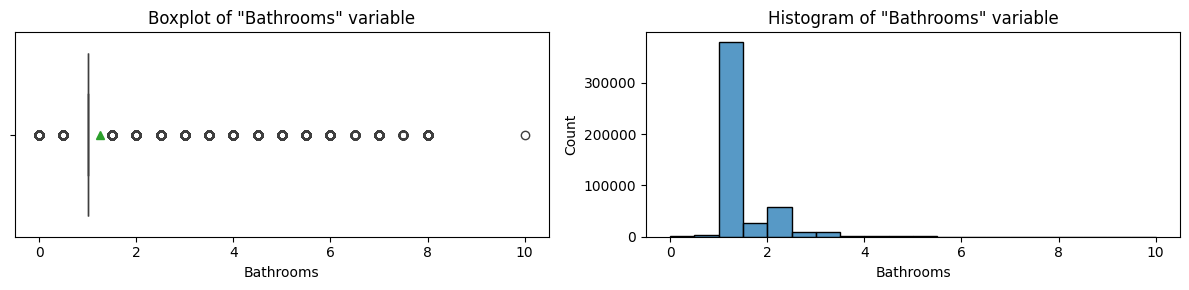

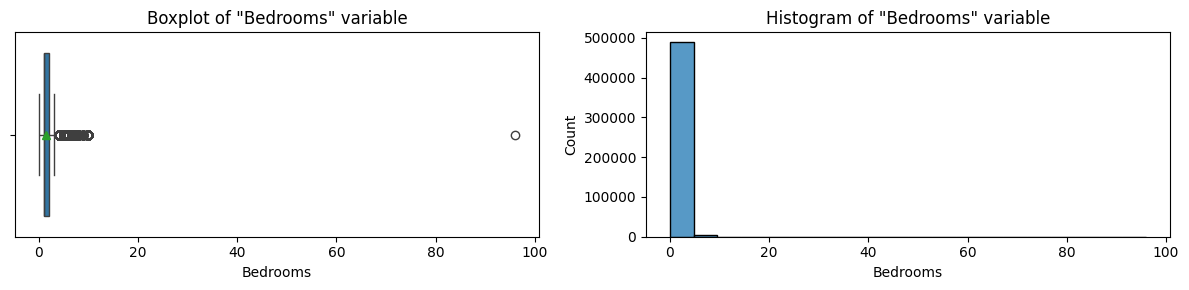

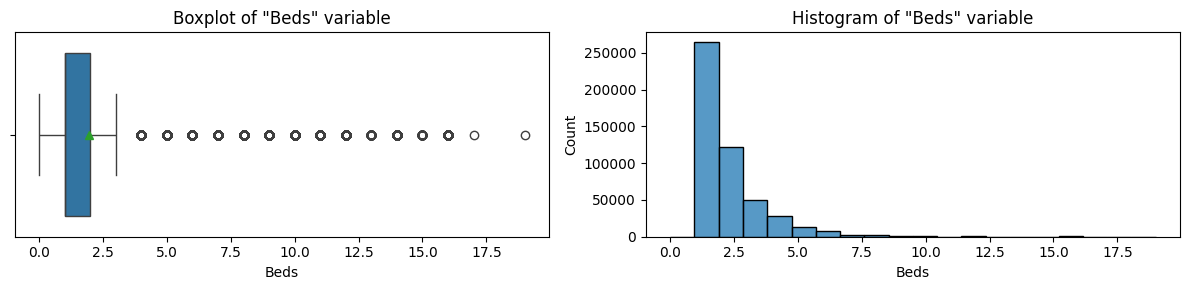

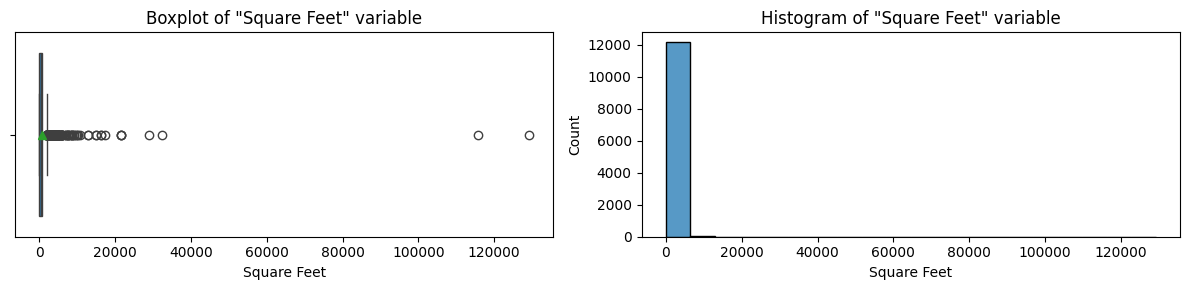

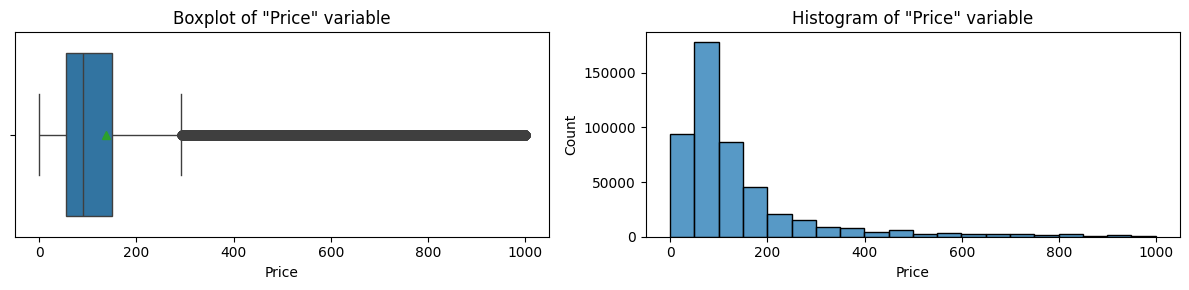

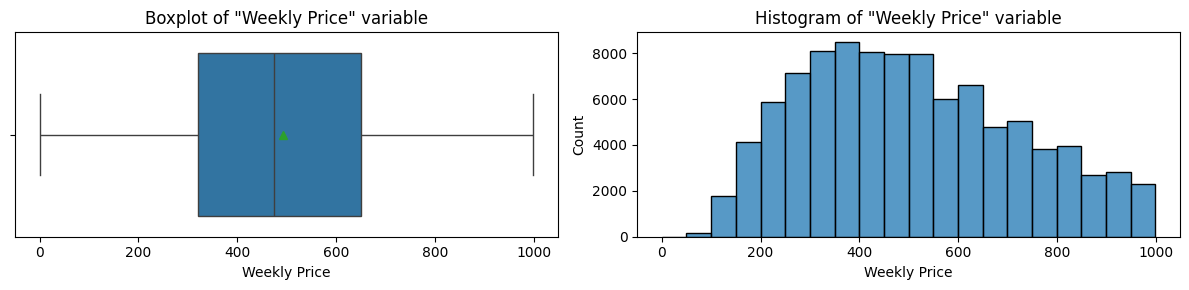

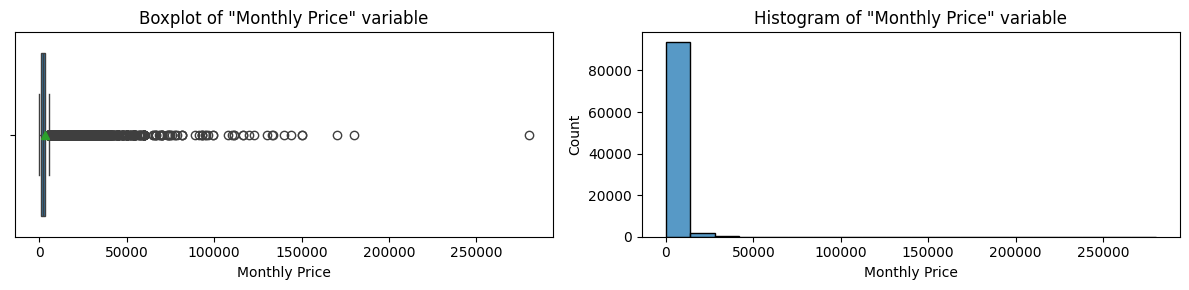

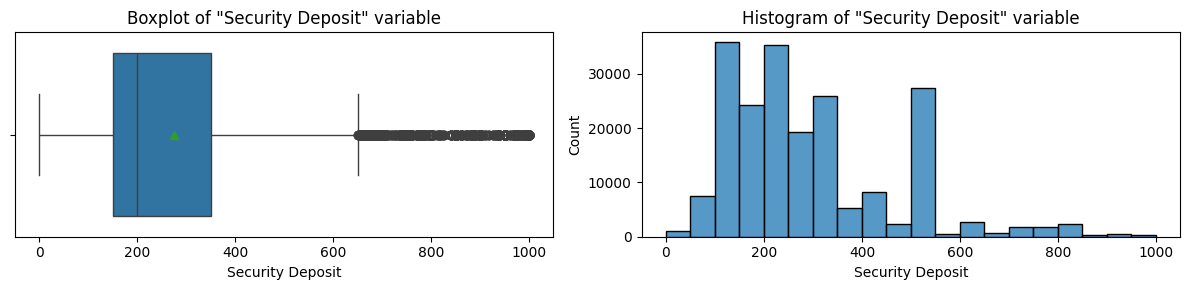

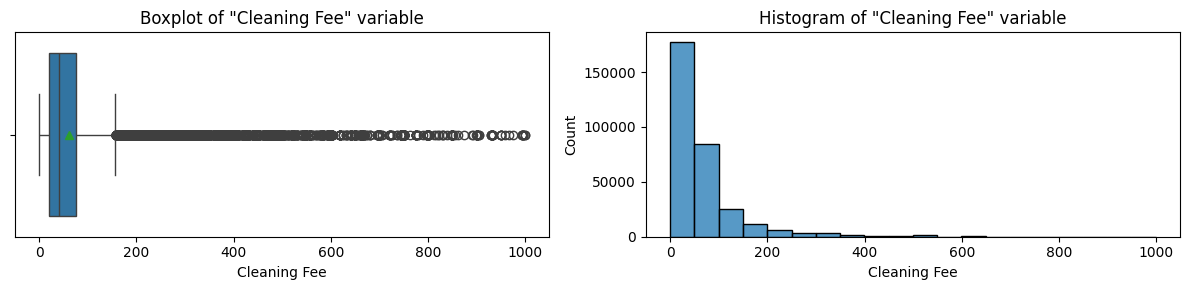

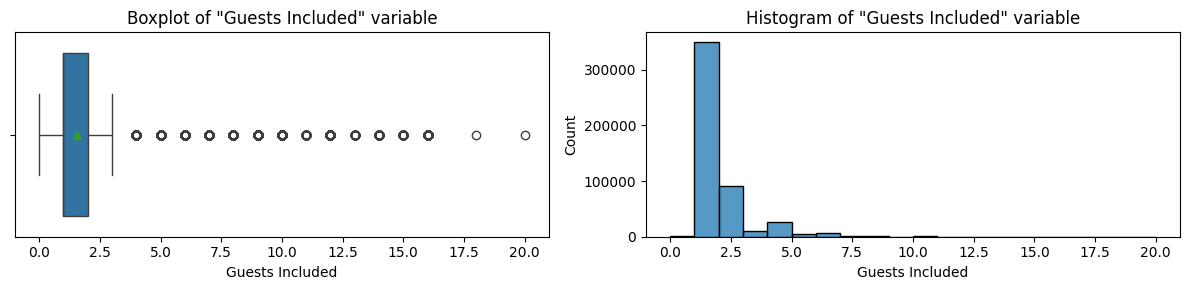

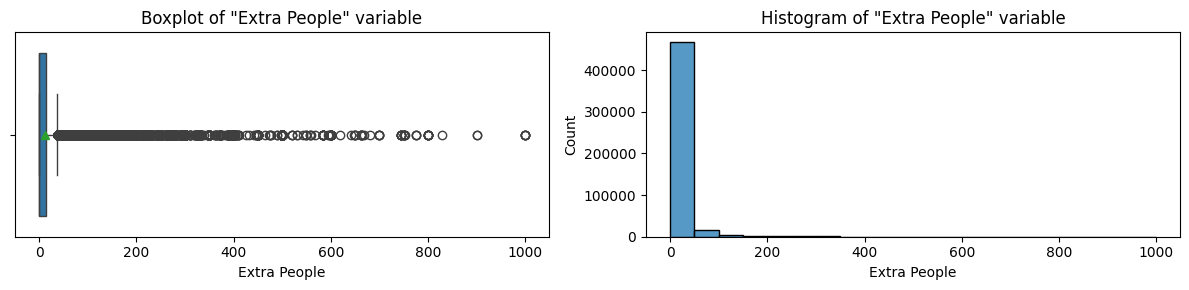

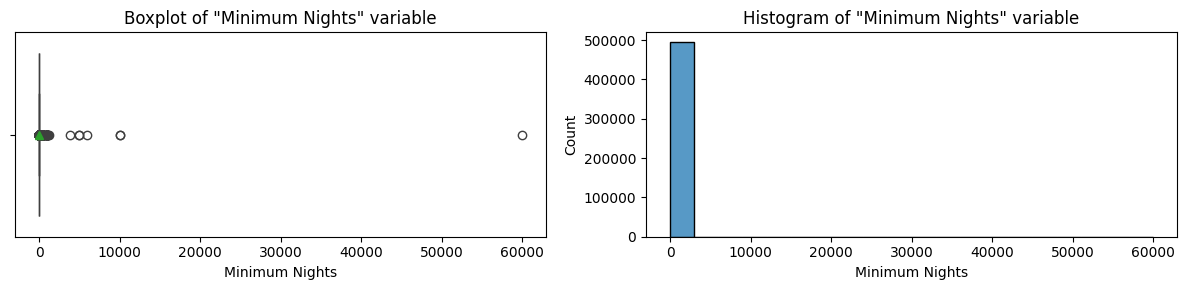

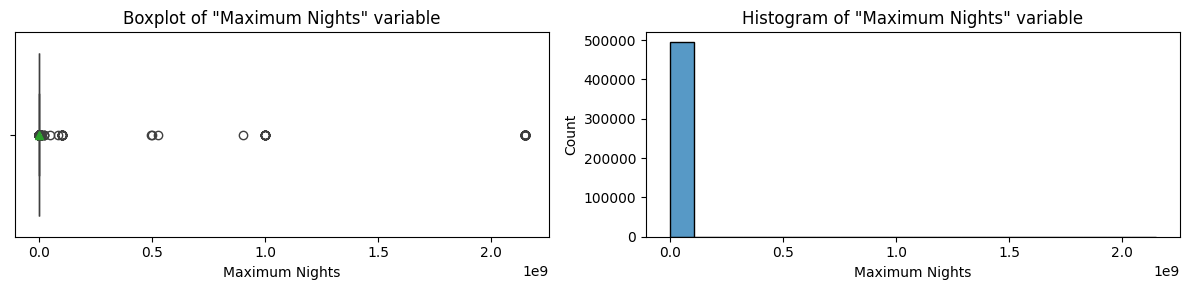

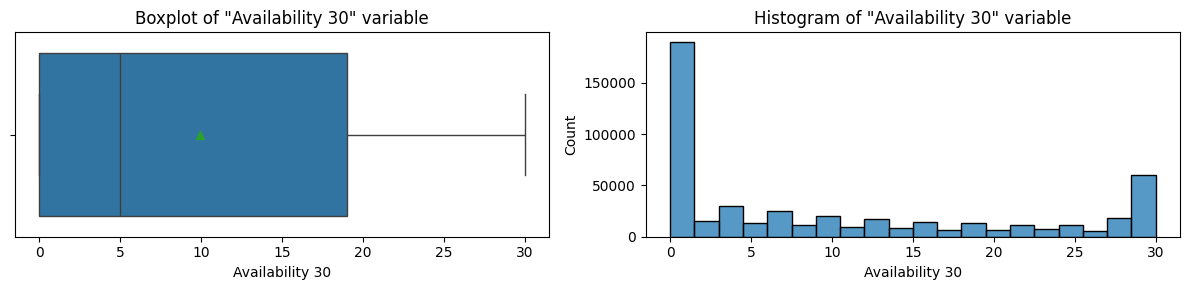

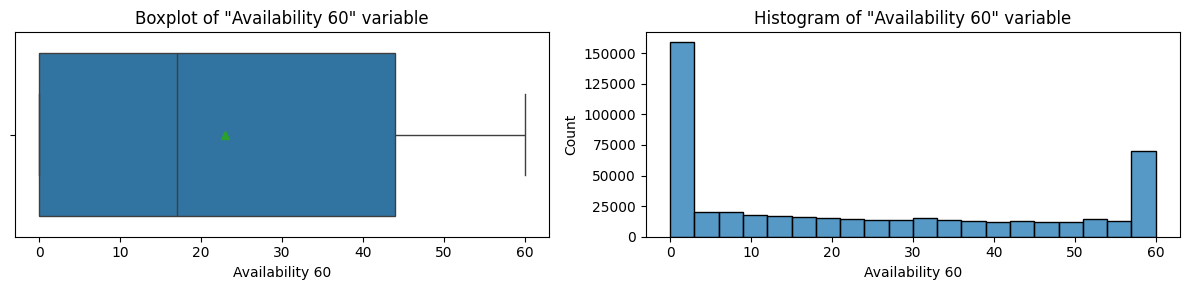

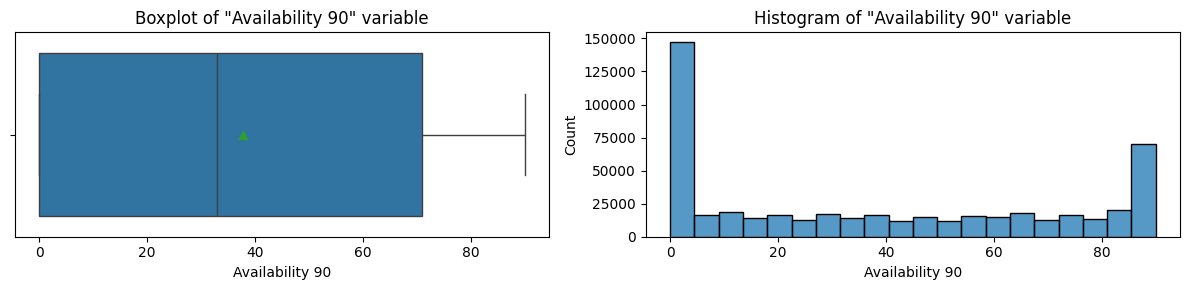

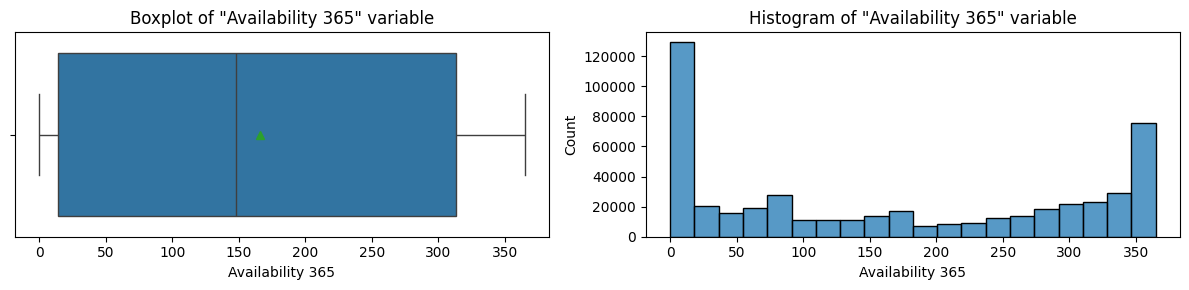

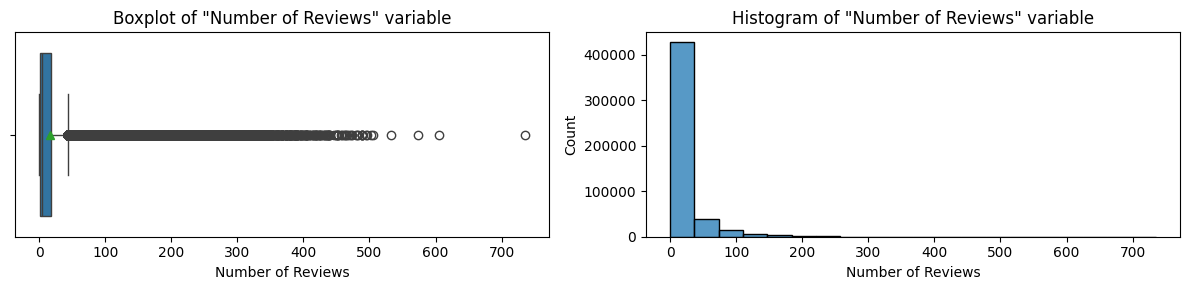

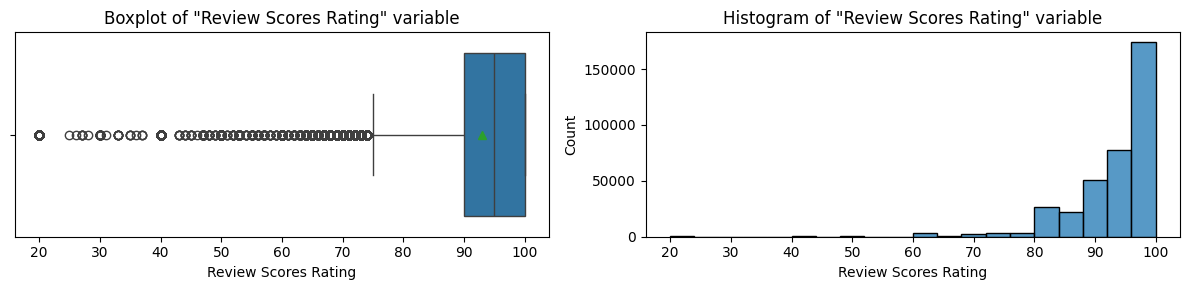

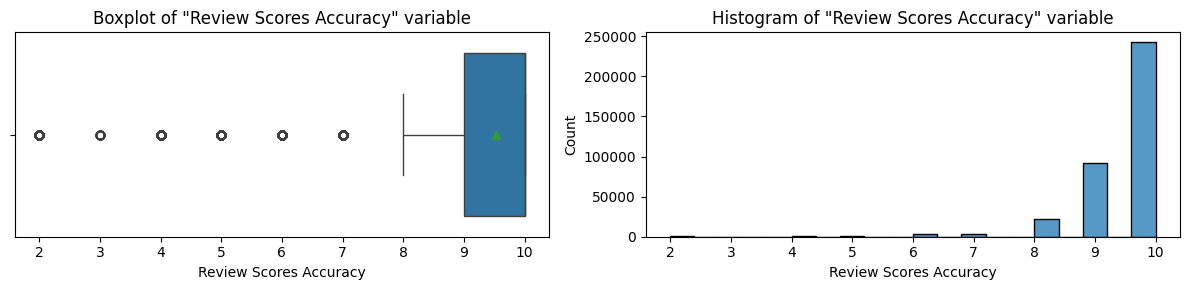

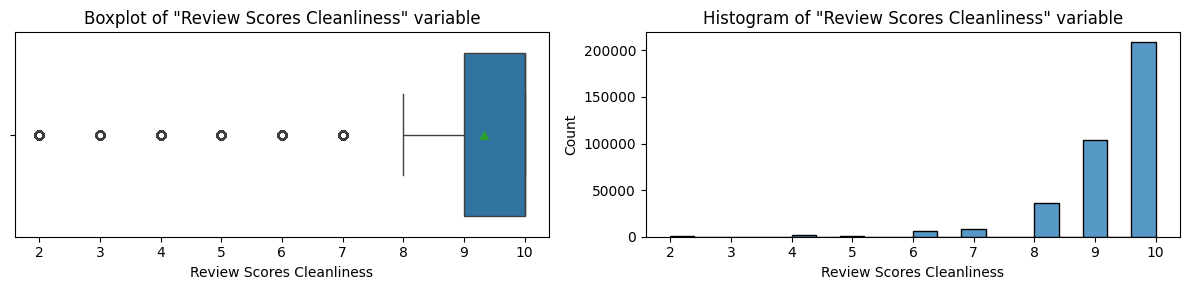

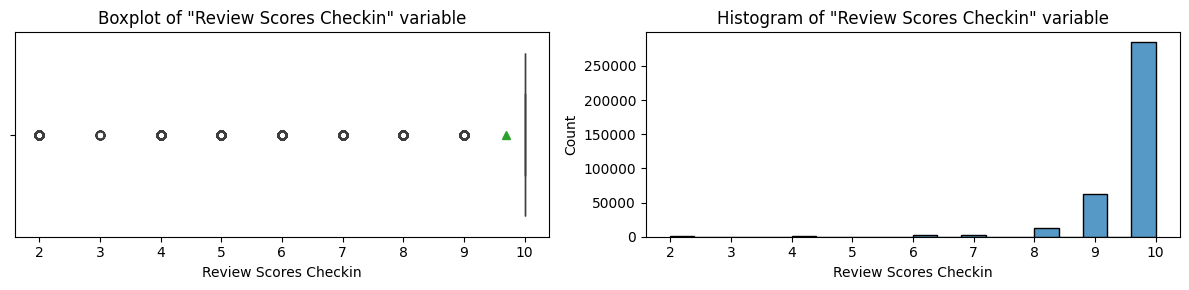

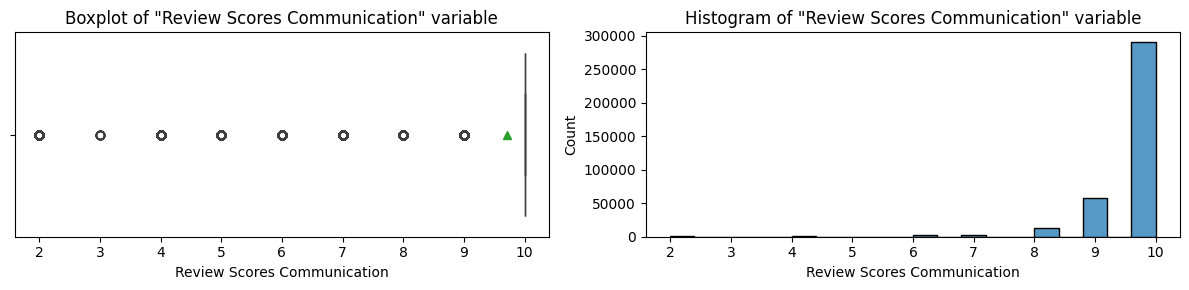

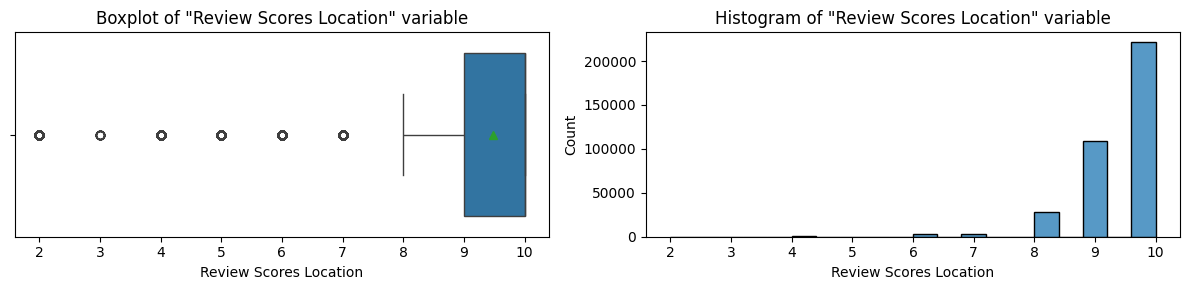

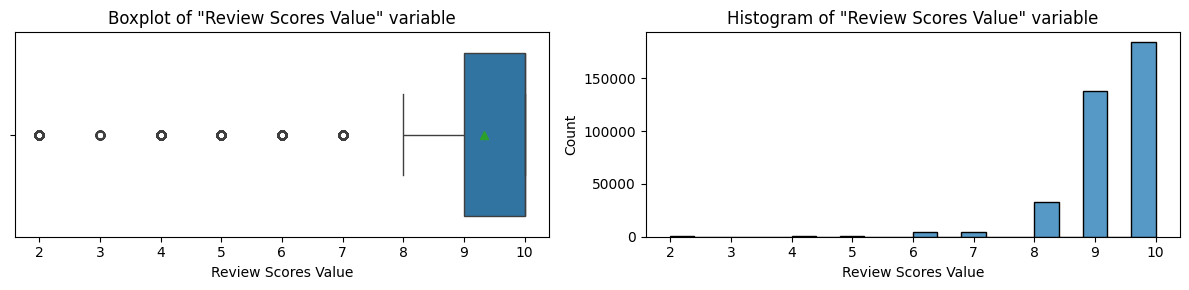

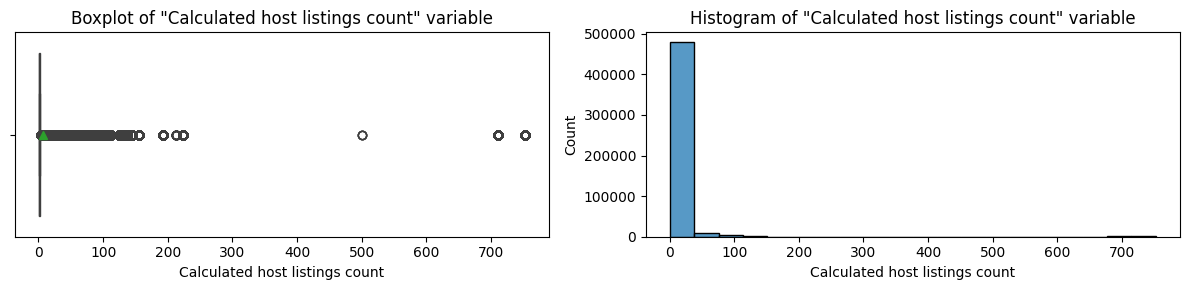

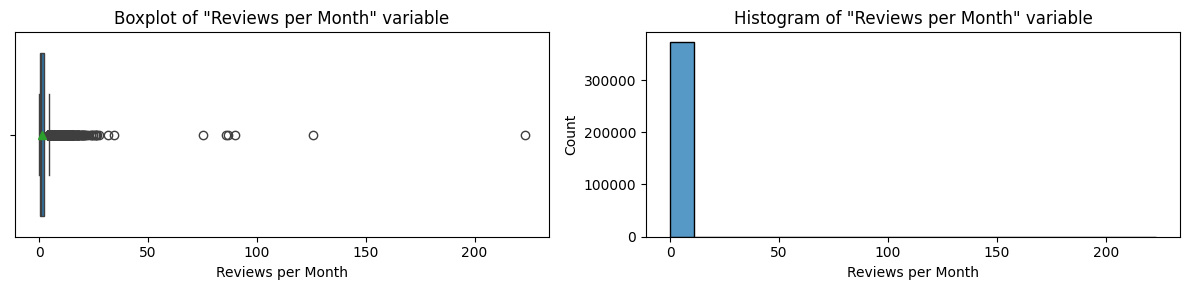

In [1126]:
for variable in quantitative_columns:
    display_distribution_numerical(variable)

With the help of the latest graphs, we can identify numerous outliers, indicating the need for a subsequent step to address these atypical values.

### 2.3 Data Cleaning
#### 2.3.1 Remove duplicates
Now that we have quickly sorted through the columns that may be useful, it's also important to consider whether there are redundant rows to be removed. Indeed, since these data were obtained through scraping, it's possible that the scraper collected multiple instances of the same data.

In [1127]:
number_duplicated = dataset.duplicated().sum()
print("Total number of duplicates :", number_duplicated)

Total number of duplicates : 2


Here, we have two duplicate rows, so we no need to delete some duplicate rows.

In [1128]:
dataset.drop_duplicates(inplace=True)

#### 2.3.2 Remove values errors

During the analysis of the distribution, we identified values in certain attributes that are considered errors. 

To address this, we will remove these erroneous values and replace them with null values. The null values will be imputed in the subsequent steps of our data processing pipeline.

To facilitate the removal of these errors, I decided to gather them in a list of tuples, each containing two values (the name of the column with an erroneous value and the value itself that needs to be removed).

In [1129]:
errors_values_list = [('Experiences Offered', '1'), ('Host Response Time', '-122.41000020536359'), ('Host Acceptance Rate', 'Apartment'),
                      ('Property Type', '2017-04-02'), ('Room Type', '9'),('Bed Type', '9') ,('Calendar Updated', '1')]

In [1130]:
for col_name, error_value in errors_values_list:
    dataset[col_name] = dataset[col_name].replace(error_value, pd.NA)

#### 2.3.3 Outliers Treatment

In [1131]:
quantitative_columns

Index(['Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month'],
      dtype='object')

Dans la rapide analyse desdistribution des variables quantitative, nous avons utilisé des boxplots pour étudier la distribution de chaque variable et détecter des potentiels outliers. 

Cependant, les boxplots utilisent la méthode des quartiles pour identifier les outliers. Cependant, cette approche possède des limites avec de gros dataset, ce qui est notre cas actuel. Celle-ci utilise la plage interquartile (Q3-Q1) et peut être trop restrictive. Ce qui peut impliquer à une identification excessive d'outliers. 

Dans ces cas, il peut être plus judicieux de revoir individuellement les données pour une détection d'outliers.

J'ai alors décidé de créer deux fonctions:
- la première permet d'afficher les bornes théorique à partir desquelles les boxplots considère les données comme des outliers en utilisant la méthode des interquartile.
    - La borne inférieure est calculée par : Q1 - 1.5 * (Q3 - Q1)
    - La borne supérieure est calculée par : Q1 + 1.5 * (Q3 - Q1)
- La deuxième fonction permet de supprimer les outliers d'une colonne en renseignant les bornes.

In [1132]:
def calculate_bornes_boxplot(data):
    data_array = np.array(data)

    Q1 = np.nanpercentile(data_array, 25)
    Q3 = np.nanpercentile(data_array, 75)

    IQR = Q3 - Q1
    
    limite_inferieure = Q1 - 1.5 * IQR
    limite_superieure = Q3 + 1.5 * IQR

    print((limite_inferieure, limite_superieure))

In [1133]:
def delete_outliers(data, seuil_inf=None, seuil_sup=None):
    data_copy = data.copy() 

    if seuil_inf is not None:
        mask_inf = data_copy < seuil_inf
        data_copy.loc[mask_inf] = np.nan

    if seuil_sup is not None:
        mask_sup = data_copy > seuil_sup
        data_copy.loc[mask_sup] = np.nan
        
    return data_copy


In [1134]:
def study_outliers(col_name):
    display_distribution_numerical(col_name)
    print('>>> Bornes Boxplots outliers for the feature : ', col_name)
    calculate_bornes_boxplot(dataset[col_name])

Intéressons nous dans un premier temps à la variable "Reviews per Month" :

In [1135]:
# study_outliers('Reviews per Month')

Ici, nous pouvons constater la présence évidente d'outliers. Il y a plus de reviews d'utilisateurs qu'il n'y a de jours dans un mois. Cependant, je trouve la méthode des quartile trop stricte. En effet, celle-ci suggère que c'est un outliers d'un qu'il y a un peut moins d'une reviews par semaine. J'ai donc considéré comme un outliers dès qu'il y a plus de 2 reviews par semaines soit 2*4 semaines = 8 reviews/mois.

In [1136]:
# dataset[dataset['Reviews per Month'] > 10]

In [1137]:
# dataset['Reviews per Month'] = delete_outliers(dataset['Reviews per Month'], seuil_inf=None, seuil_sup=8)

Intéressons nous dans un premier temps à la variable "Bedrooms" :

In [1138]:
# study_outliers('Bedrooms')

La borne de 3.5 me semble également exagéré. Regardons les biens avec plus de 10 chambres.

In [1139]:
# dataset[dataset['Bedrooms'] == 10][['Bedrooms', 'Property Type', 'Price', 'Accommodates', 'Square Feet']]

Ici, nous pouvons observer que des logement avec 10 chambres ne sont pas nécessairement des outliers car ils sont par nature prédisposé a avoir beacuoup de chambre. C'est notamment le cas pour les hôtel, Bed & Breakfast, Villa, ...

Cependant, pour le bien avec plus de 10 chambres, ce n'est pas le cas, c'est réellement un outliers qu'il faut supprimer.

In [1140]:
# dataset[dataset['Bedrooms'] > 10]

In [1141]:
# dataset['Bedrooms'] = delete_outliers(dataset['Bedrooms'], seuil_inf=None, seuil_sup=10)

In [1142]:
# study_outliers('Bedrooms')

Voyons pour la feature Extra People.

In [1143]:
# study_outliers('Extra People')

Ici, justement c'est l'inverse, je trouve la borne pas assez elevée je considère que c'est un outlier dès qu'il y a plus de 10 extra people dans le bien, soit plus qu'il y a de chambres.

In [1144]:
# dataset.loc[dataset['Extra People'] > dataset['Beds'], 'Extra People'] = np.nan
# dataset.loc[dataset['Extra People'] > 20, 'Extra People'] = np.nan

In [1145]:
# study_outliers('Extra People')

Voyons pour la feature Minimum Nights.

In [1146]:
# study_outliers('Minimum Nights')

Ici, je suis d'accord avec les bornes du boxplots. Un minimum de 6 nuit force les personnes à rester une semaine minimum dans le logement.

In [1147]:
# dataset['Minimum Nights'] = delete_outliers(dataset['Minimum Nights'], seuil_inf=None, seuil_sup=6)

Voyons pour la feature Maximum Nights.

In [1148]:
# study_outliers('Maximum Nights')

ici, on peut observer que des personnes ont essayer de mettre une très grande valeurs pour indiquer aux voyageurs qu'ils peuvent rester autant de temps qu'ils le souhaite. Suivant ce que préconise la méthode des quartile.

In [1149]:
# dataset[dataset['Maximum Nights'] > 2764]

In [1150]:
# dataset['Maximum Nights'] = delete_outliers(dataset['Maximum Nights'], seuil_inf=None, seuil_sup=2764)

In [1151]:
# study_outliers('Maximum Nights')

study_outliers('Extra People')

In [1152]:
# study_outliers('Guests Included')

In [1153]:
# dataset[dataset['Guests Included'] > dataset['Beds']]

In [1154]:
# dataset.loc[dataset['Guests Included'] > dataset['Beds'], 'Guests Included'] = np.nan

In [1155]:
# study_outliers('Guests Included')

In [1156]:
# dataset[dataset['Guests Included'] > 10]

In [1157]:
# study_outliers('Beds')

In [1158]:
# study_outliers('Bathrooms')

In [1159]:
# dataset[dataset['Bathrooms']-0.5 > dataset['Beds']]

In [1160]:
# dataset.loc[dataset['Bathrooms']-0.5 > dataset['Beds'], 'Bathrooms'] = np.nan

In [1161]:
# study_outliers('Bathrooms')

In [1162]:
# study_outliers('Square Feet')

In [1163]:
# dataset[dataset['Square Feet'] > 2000]

In [1164]:
# dataset.loc[dataset['Square Feet'] > 2000, 'Square Feet'] = np.nan

In [1165]:
# study_outliers('Monthly Price')

In [1166]:
# dataset[dataset['Monthly Price'] > 31*dataset['Price']]

In [1167]:
# study_outliers('Monthly Price')

In [1168]:
# dataset.loc[dataset['Monthly Price'] > 5732.625, 'Monthly Price'] = np.nan

In [1169]:
# dataset.loc[dataset['Monthly Price'] > 31*dataset['Price'], 'Monthly Price'] = np.nan

In [1170]:
# study_outliers('Monthly Price')

#### 2.3.4 Handle Missing Values
We will now addressing the missing values in our dataset. Our first step involves identifying features with missing values in order to assesse if we need drop the feature or impute a value. 

To begin, let's define a function to display the percentage of missing data for each feature and display it as a graph.

In [1171]:
def display_missing_values():
    missing_percentage = dataset.isna().mean() * 100
    missing_percentage = missing_percentage.sort_values(ascending=False)
    
    print('Percentage of missing values for each features :')
    print(missing_percentage)

    plt.figure(figsize=(10, 10))
    missing_percentage.sort_values().plot(kind='barh')
    plt.xlabel('Percentage of missing values for each features')
    plt.ylabel('Features')
    plt.title('Percentage missing values')
    plt.grid(axis='x')
    plt.show()

Percentage of missing values for each features :
Has Availability                  98.119616
Square Feet                       97.533296
Host Acceptance Rate              91.462809
Monthly Price                     80.585996
Weekly Price                      80.251418
Security Deposit                  58.781862
Cleaning Fee                      36.213411
Review Scores Value               26.079499
Review Scores Checkin             26.070407
Review Scores Location            26.060103
Review Scores Accuracy            26.005754
Review Scores Communication       25.966154
Review Scores Cleanliness         25.956860
Review Scores Rating              25.824726
Reviews per Month                 24.650269
Host Response Time                23.248719
Host Response Rate                23.248719
Price                              1.607833
Amenities                          0.906755
Bathrooms                          0.308313
Beds                               0.185270
Calculated host listings co

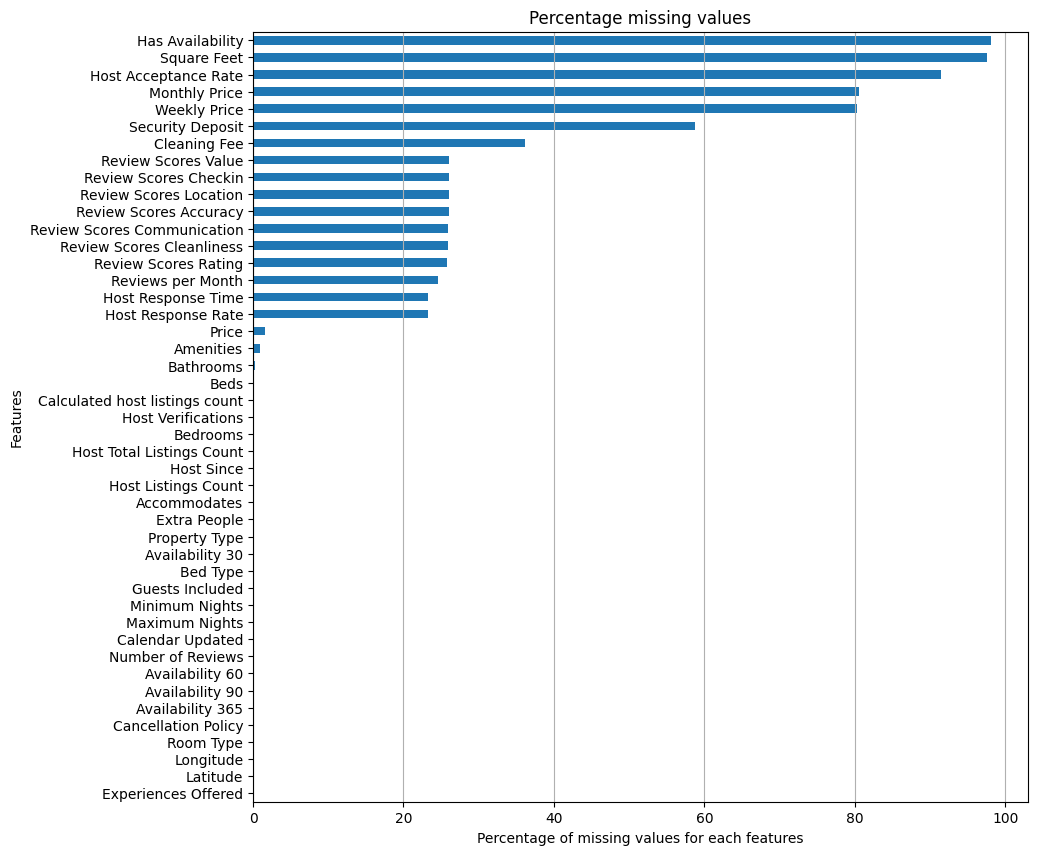

In [1172]:
display_missing_values()

We can observe that each feature in our dataset has missing values except for only the  ``Experiences Offered`` attribute. So we have to deal with them all.

Our primary goal is to predict the price of our accommodations. Therefore, it is crucial that all rows have the price specified. This is why I have decided to drop the rows that do not have information on the price.

In [1173]:
dataset.dropna(subset=['Price'], inplace=True)

We can observe that there are many missing values for our dependent variables ``Monthly Price`` and ``Weekly Price``. Therefore, I have decided to impute values for these features using the price multiplied by the number of days

In [1174]:
missing_months_price = dataset[pd.isna(dataset['Monthly Price'])]
dataset.loc[pd.isna(dataset['Monthly Price']), 'Monthly Price'] = missing_months_price['Price'] * 30.5

In [1175]:
missing_weekly_price = dataset[pd.isna(dataset['Weekly Price'])]
dataset.loc[pd.isna(dataset['Weekly Price']), 'Weekly Price'] = missing_weekly_price['Price'] * 7

To enhance the quality of our data, I have made the decision to drop columns that exhibit more than 50% missing values. The presence of a significant number of missing values can compromise the integrity of our analyses and the accuracy of our models. 

In [1176]:
dataset.dropna(axis=1, thresh=0.5 * len(dataset), inplace=True)

For all the review scores, I have chosen to handle missing values by imputing the most frequently occurring value. This imputation strategy is particularly useful when dealing with ordinal data.

In [1177]:
review_score_columns = ['Review Scores Value', 'Review Scores Checkin', 'Review Scores Location', 'Review Scores Accuracy', 'Review Scores Communication', 'Review Scores Cleanliness', 'Review Scores Rating']
for review_score_name in review_score_columns:
    most_frequent_value = dataset[review_score_name].mode()[0]
    dataset[review_score_name].fillna(most_frequent_value, inplace=True)

In addition, for missing values in the ``Host Since`` column, I have chosen to impute the most frequently occurring value. 

In [1178]:
most_frequent_host_since = dataset['Host Since'].mode()[0]
dataset['Host Since'].fillna(most_frequent_host_since, inplace=True)

I have decided to impute the value of 0 to the missing values of ``Number of Reviews``, indicating that the accommodation has not received any reviews in cases where the field is not filled.

In [1179]:
dataset['Number of Reviews'].fillna(0, inplace=True)

To impute values for ``Reviews per Month``, I have decided to examine whether the accommodation has received reviews:
- If it has never received any reviews, I assign it the value of 0.
- If it has received reviews, I calculate the number of months between the accommodation's ``Host Since`` date and the latest ``Host Since`` date in the entire dataset. Then, I divide the number of reviews by the calculated number of months.

Here, we are adding a temporary column, ``Days Since Hosting``, which calculates the number of days since the listing has been on the market. This helps avoid performing calculations row by row, thus speeding up the process. We will retain this feature for future use to replace the ``Host Since`` feature because they provide the same information, but encoded as an integer instead of a category.

In [1180]:
latest_host_since = dataset['Host Since'].max()
dataset['Days Since Hosting'] = (pd.to_datetime(latest_host_since) - pd.to_datetime(dataset['Host Since'])).dt.days

In [1181]:
def calculate_reviews_per_month(row):
    if pd.notna(row['Reviews per Month']):
        return row['Reviews per Month']
    
    nb_review = row['Number of Reviews']
    nb_months_since_hosting = row['Days Since Hosting'] // 30.5

    if pd.isnull(nb_review) or nb_months_since_hosting <= 0:
        return 0
    else:
        return nb_review / nb_months_since_hosting

In [1182]:
dataset['Reviews per Month'] = dataset.apply(calculate_reviews_per_month, axis=1)

Now, let's turn our attention to the ``Amenities`` attribute. Each provided value appears as a string where individual amenities are separated by commas. I assume that accommodations with missing data do not have any amenities, so I fill in the missing values with an empty string.

In [1183]:
dataset['Amenities'].fillna('', inplace=True)

For each feature related to availability, guest count, listing count, and the number of rooms/beds/bathrooms, cleaning fee, I have opted to impute the median value, as these are numerical variables and to ensures that we fill in missing values with a representative value. The median, being the middle value in a sorted dataset, is less influenced by extreme values compared to the mean, especially when dealing with ordinal values. 

In [1184]:
columns_name_impute_median = ['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Bathrooms', 'Beds', 'Bedrooms', 'Calculated host listings count', 'Host Total Listings Count', 'Host Listings Count', 'Maximum Nights', 'Minimum Nights', 'Guests Included', 'Extra People', 'Accommodates', 'Cleaning Fee', 'Host Response Rate']
for col_name in columns_name_impute_median:
    available_median = dataset[col_name].median()
    dataset[col_name].fillna(available_median, inplace=True)

As for attributes such as ``Host Verifications``, ``Host Response Time``, ``Property Type``, ``Room Type``, ``Bed Type``, ``Experiences Offered``, ``Calendar Updated`` and ``Cancellation Policy``, being categorical variables, I have chosen to impute their missing values with the most frequently occurring values

In [1185]:
for col_name in ['Host Verifications', 'Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 'Experiences Offered', 'Calendar Updated']:
    most_frequent_value = dataset[col_name].mode()[0]
    dataset[col_name].fillna(most_frequent_value, inplace=True)

Let's check again our missing values.

Percentage of missing values for each features :
Experiences Offered               0.0
Review Scores Rating              0.0
Minimum Nights                    0.0
Maximum Nights                    0.0
Calendar Updated                  0.0
Availability 30                   0.0
Availability 60                   0.0
Availability 90                   0.0
Availability 365                  0.0
Number of Reviews                 0.0
Review Scores Accuracy            0.0
Host Since                        0.0
Review Scores Cleanliness         0.0
Review Scores Checkin             0.0
Review Scores Communication       0.0
Review Scores Location            0.0
Review Scores Value               0.0
Cancellation Policy               0.0
Calculated host listings count    0.0
Reviews per Month                 0.0
Extra People                      0.0
Guests Included                   0.0
Cleaning Fee                      0.0
Monthly Price                     0.0
Host Response Time                0.0
H

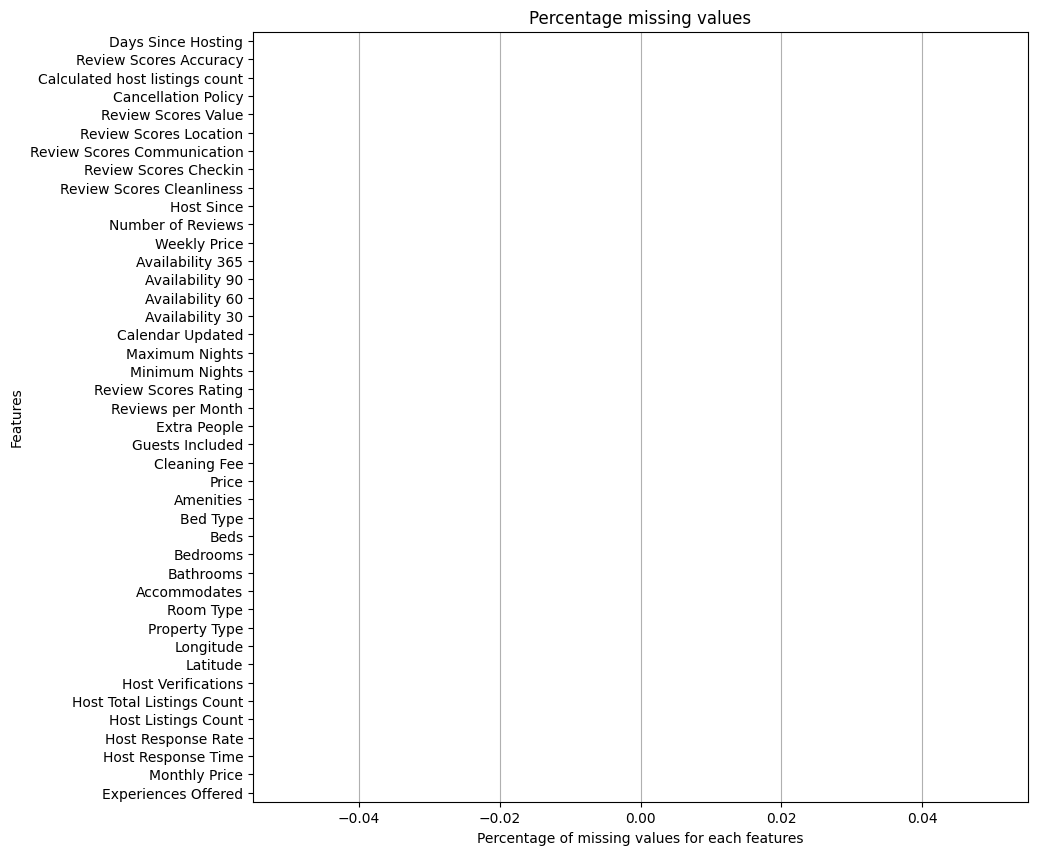

In [1186]:
display_missing_values()

Now, we don't have missing values anymore.

### 2.4 Feature Selection

### 2.5 Data Preprocessing
#### 2.5.1 Transformations

As we saw during the analysis phase, several transformations need to be applied to our data for the following attributes:
- ``Host Since`` : Encode it with the number of days instead of a date in string format
- ``Calendar Updated`` : Encode it as the number of days instead of a string
- ``Cancellation Policy`` : Group values together as they actually refer to the same thing
- ``Property Type`` : Reduce the number of possible values for the property type

All these transformations aim to:
- Convert categorical variables into numerical ones.
- Reduce the number of unique values taken by some of our categorical variables to generate the minimum number of features with our encoders. 

This helps minimize the dimensionality of our input data to the model, speeding up training while retaining as much precision as possible.

##### Transform Host Since feature

Let's first try to replace the ``Host Since`` feature, which is a category feature, with the number of days the offer is on the market.

In [1187]:
dataset['Host Since'].unique()

array(['2011-09-22', '2015-10-31', '2012-10-17', ..., '2008-05-26',
       '2008-08-26', '2009-06-22'], dtype=object)

I'd like to remind you that this attribute was already created previously under the name of ``Days Since Hosting`` to fill the ratio of the number of reviews to the number of months. 

In [1188]:
dataset['Days Since Hosting'].unique()

array([2092,  592, 1701, ..., 3306, 3214, 2914], dtype=int64)

So we have only to drop the current column ``Host Since``.

In [1189]:
dataset.drop(['Host Since'], axis=1, inplace=True)

##### Transform Cancellation Policy feature

Here, several values, as we saw during the analysis step, can be grouped into other values.
- "flexible" can group "flexible" and "flexible_new."
- "moderate" can group "moderate" and "moderate_new."
- "strict" can group "strict" and "strict_new."
- "super_strict" can group "super_strict_30," "super_strict_30_new," "super_strict_60," and "super_strict_60_new."

In [1190]:
dataset['Cancellation Policy'].unique()

array(['flexible', 'moderate', 'strict', 'super_strict_30',
       'super_strict_60', 'moderate_new', 'flexible_new', 'strict_new',
       'super_strict_30_new', 'super_strict_60_new', 'no_refunds',
       'long_term'], dtype=object)

In [1191]:
dataset['Cancellation Policy']= dataset['Cancellation Policy'].replace('flexible_new', 'flexible')
dataset['Cancellation Policy']= dataset['Cancellation Policy'].replace('moderate_new', 'moderate')
dataset['Cancellation Policy']= dataset['Cancellation Policy'].replace('strict_new', 'strict')
dataset['Cancellation Policy']= dataset['Cancellation Policy'].replace('super_strict_30', 'super_strict')
dataset['Cancellation Policy']= dataset['Cancellation Policy'].replace('super_strict_30_new', 'super_strict')
dataset['Cancellation Policy']= dataset['Cancellation Policy'].replace('super_strict_60', 'super_strict')
dataset['Cancellation Policy']= dataset['Cancellation Policy'].replace('super_strict_60_new', 'super_strict')

In [1192]:
dataset['Cancellation Policy'].unique()

array(['flexible', 'moderate', 'strict', 'super_strict', 'no_refunds',
       'long_term'], dtype=object)

Reducing it in this way will allow us to encode it in such a way as to establish a hierarchy in the data, from the most flexible to the strictest.

##### Transform Property Type feature
Concerning the Property Type, I decided to group the different features together to reduce the size and, consequently, the number of features that will be generated after a future One Hot Encoder.

In [1193]:
dataset['Property Type'].unique()

array(['Apartment', 'Bed & Breakfast', 'Townhouse', 'House', 'Loft',
       'Condominium', 'Guesthouse', 'Timeshare', 'Boutique hotel',
       'Villa', 'Serviced apartment', 'Dorm', 'Bungalow', 'Camper/RV',
       'Lighthouse', 'Treehouse', 'Other', 'Boat', 'Hostel', 'Cabin',
       'Guest suite', 'Hut', 'In-law', 'Castle', 'Yurt', 'Tent',
       'Vacation home', 'Nature lodge', 'Chalet', 'Earth House', 'Tipi',
       'Train', 'Cave', 'Entire Floor', 'Island', 'Igloo',
       'Casa particular', 'Parking Space', 'Ryokan (Japan)',
       'Pension (Korea)', 'Car', 'Plane', 'Van', 'Heritage hotel (India)'],
      dtype=object)

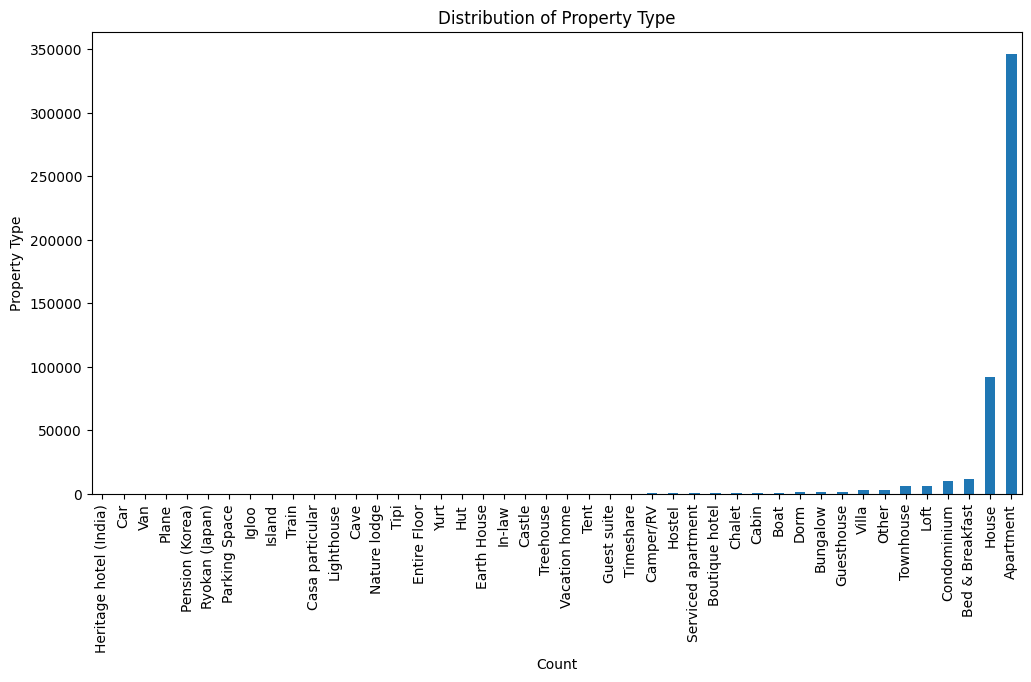

In [1194]:
column = "Property Type"
plt.figure(figsize=(12, 6))
dataset[column].value_counts(dropna=False).sort_values().plot(kind='bar')
plt.title(f'Distribution of {column}')
plt.xlabel('Count')
plt.ylabel(column)
plt.show()

Here, we can observe that the predominant property types are Apartment, House, Bed & Breakfast, Condominium, Loft, Townhouse, and Other.

In fact:
- Condominium looks like an apartment in the real world.
- Townhouse is a house in the real world.
- Bed & Breakfast resembles a hostel in the real world.

Therefore, we can group everything under the categories of House, Apartment, Hostel, and Others.

In [1195]:
for house_name_value in ['Casa particular', 'Earth House', 'Castle', 'Treehouse', 'Vacation home', 'Chalet', 'Bungalow', 'Villa', 'Townhouse', 'Guesthouse']:
    dataset['Property Type']= dataset['Property Type'].replace(house_name_value, 'House')

In [1196]:
for apartment_name_value in ['Loft', 'Condominium', 'Serviced apartment', 'Entire Floor']:
    dataset['Property Type']= dataset['Property Type'].replace(apartment_name_value, 'Apartment')

In [1197]:
for hostel_name_value in ['Ryokan (Japan)', 'Pension (Korea)', 'Guest suite', 'Cabin', 'Heritage hotel (India)', 'Dorm', 'Bed & Breakfast']:
    dataset['Property Type']= dataset['Property Type'].replace(hostel_name_value, 'Hostel')

In [1198]:
for others_name_value in [col_name for col_name in dataset['Property Type'].unique() if col_name not in ['Hostel', 'House', 'Apartment']]:
    dataset['Property Type']= dataset['Property Type'].replace(others_name_value, 'Other')

Let's check again our distribution.

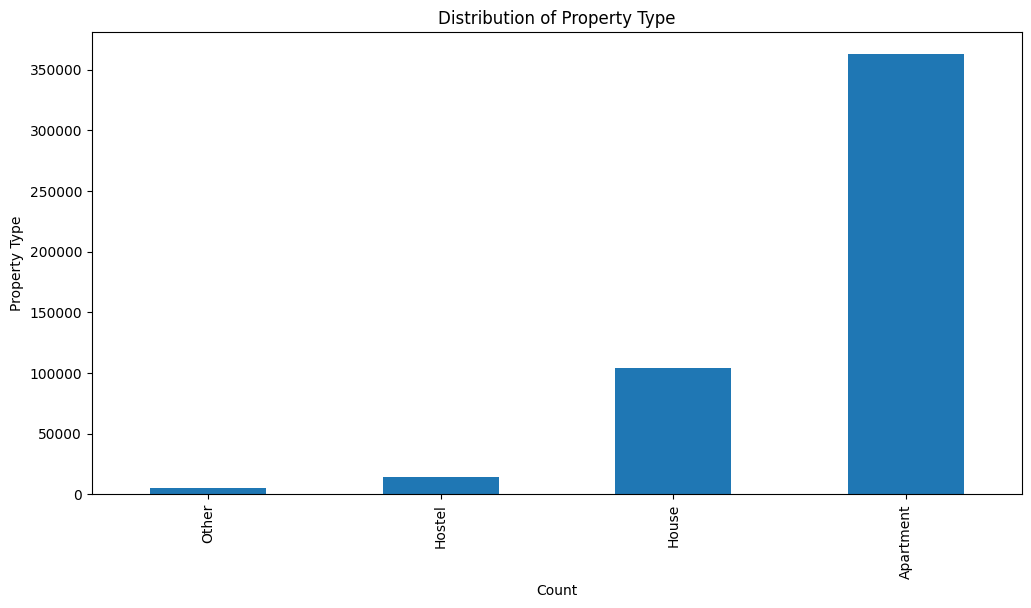

In [1199]:
column = "Property Type"
plt.figure(figsize=(12, 6))
dataset[column].value_counts(dropna=False).sort_values().plot(kind='bar')
plt.title(f'Distribution of {column}')
plt.xlabel('Count')
plt.ylabel(column)
plt.show()

Here we can see that the majority of accommodations are classified in Apartment, House, Hostel and that there is only a minority in Other.

##### Transform Calendar Updated feature

Let's transform the Calendar Updated feature into a numerical value. Instead of having a time written with letters, I aim to represent it as a number of days. 

In [1200]:
dataset['Calendar Updated'].unique()

array(['22 months ago', '2 months ago', 'today', '5 weeks ago',
       'a week ago', '5 days ago', '6 months ago', '3 months ago',
       '2 weeks ago', '3 days ago', '3 weeks ago', '4 months ago',
       '21 months ago', 'yesterday', '6 weeks ago', '5 months ago',
       '6 days ago', '8 months ago', '12 months ago', '2 days ago',
       '18 months ago', '4 days ago', '7 months ago', '37 months ago',
       '1 week ago', '7 weeks ago', '9 months ago', '11 months ago',
       '10 months ago', 'never', '38 months ago', '20 months ago',
       '4 weeks ago', '13 months ago', '24 months ago', '36 months ago',
       '16 months ago', '25 months ago', '15 months ago', '26 months ago',
       '19 months ago', '14 months ago', '28 months ago', '23 months ago',
       '17 months ago', '29 months ago', '33 months ago', '44 months ago',
       '31 months ago', '34 months ago', '30 months ago', '32 months ago',
       '27 months ago', '35 months ago', '58 months ago', '63 months ago',
       '57 

That's why we will replace:
- "today" with 0
- "yesterday" with 1
- "X days ago" with X
- "a week ago" with 7
- "X week ago" with X*7
- "X months ago" with X*30.5
- "never" with -1

This will provide more meaningful information for our models without introducing a multitude of new features through the use of One Hot Encoding.

In [1201]:
def transform_calendar_updated(value):
    if value == 'today':
        return 0
    elif value == 'yesterday':
        return 1
    elif value == 'a week ago':
        return 7
    elif value == 'never':
        return -1
    else:
        match = re.match(r'(\d+) (day|week|month)', value)
        if match:
            number, time_period = match.groups()
            number = int(number)
            if time_period == 'day':
                return number
            elif time_period == 'week':
                return number * 7
            elif time_period == 'month':
                return int(number * 30.5)
    return value

In [1202]:
dataset['Calendar Updated'] = dataset['Calendar Updated'].apply(transform_calendar_updated)

We have now only numerical values.

In [1203]:
dataset['Calendar Updated'].unique()

array([ 671,   61,    0,   35,    7,    5,  183,   91,   14,    3,   21,
        122,  640,    1,   42,  152,    6,  244,  366,    2,  549,    4,
        213, 1128,   49,  274,  335,  305,   -1, 1159,  610,   28,  396,
        732, 1098,  488,  762,  457,  793,  579,  427,  854,  701,  518,
        884, 1006, 1342,  945, 1037,  915,  976,  823, 1067, 1769, 1921,
       1738, 1464, 1372, 1189, 1830, 1677, 1220, 1891, 1403, 1525, 1250,
       1433, 1586, 1494, 1799, 1708, 1555, 1860, 1647, 1952, 1616, 1311,
       1281], dtype=int64)

We now need to check if Pandas has correctly detected the data type change. In the other case, we will need to specify to Pandas that the type of this feature has changed so that it is considered as a numerical feature rather than a categorical one.

In [1204]:
dataset['Calendar Updated'].info()

<class 'pandas.core.series.Series'>
Index: 486994 entries, 6017649 to 10562264
Series name: Calendar Updated
Non-Null Count   Dtype
--------------   -----
486994 non-null  int64
dtypes: int64(1)
memory usage: 7.4+ MB


It seems that Pandas automatically detected the change in the column's data type. Therefore, there is no need to manually change the data type.

#### 2.5.2 Feature Engineering
##### 2.5.2.1 Creating New Features

As we saw during the analysis phase, there is a way to reduce the number of values to encode for the ``Amenities`` and ``Host Verifications`` features.

These two features have a significant number of unique values because they are, in reality, composed of multiple values that repeat, separated by commas, not necessarily in the same order.

To recall, the current number of unique values for:
- ``Amenities`` :
- ``Host Verification`` :

In reality, each ``amenity`` and ``host verification`` themselves consist of a much smaller number of unique values.

Recall that the current values taken by ``Amenities`` and ``Host Verifications`` are combinations of a more limited set of unique values for:
- Real number of unique values for ``Amenities`` :
- Real number of unique values for ``Host Verification`` :

These values still represent a significant quantity of unique values to encode. That's why we studied earlier their distribution, and we noticed that those that we are using only a very small number of them. Therefore, it's unnecessary to try to encode values that are very rarely used. In the dedicated section, we will only encode the values that occur most frequently to avoid having attributes with almost only 0 values and reduce the number of values to encode to improve model performance.

However, if we do this, we would lose a lot of information. To limitate this loss, I decided to add two new features (one for ``Amenities`` and one for ``Host Verifications``) that calculate the number of different Amenities/host verifications for the accommodation (number of items seperate by comma).

For exemple :
- For Amenities :

| Amenities                                                    | New feature      |
|--------------------------------------------------------------|------------------|
| Internet,Wireless Internet,Kitchen,Heating,Washer,Essentials | 6                |
| Internet,Kitchen                                             | 2                |
  
- For Host Verifications :

| Host Verifications           | New feature |
|------------------------------|-------------|
| email,phone,facebook,reviews | 4           |
| email,phone                  | 2           |

So, I would group the numerous numerical values into only one numerical feature, that I would had initially ignoring.

In [1205]:
dataset['Amenities'].unique()

array(['Internet,Wireless Internet,Kitchen,Heating,Washer,Essentials',
       'TV,Cable TV,Internet,Wireless Internet,Kitchen,Buzzer/wireless intercom,Heating,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50',
       'TV,Internet,Wireless Internet,Breakfast,Heating,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo',
       ...,
       'TV,Internet,Wireless Internet,Kitchen,Pets live on this property,Cat(s),Buzzer/wireless intercom,Heating,Washer,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       'TV,Cable TV,Internet,Wireless Internet,Buzzer/wireless intercom,Heating,Smoke detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50',
       'Wireless Intern

In [1206]:
dataset['Host Verifications'].unique()

array(['email,phone,facebook,reviews',
       'email,phone,reviews,jumio,government_id', 'email,phone,reviews',
       ...,
       'email,phone,facebook,amex,reviews,jumio,kba,government_id,work_email',
       'email,phone,reviews,manual_offline,kba,work_email',
       'email,phone,facebook,google,amex,kba'], dtype=object)

In [1207]:
def count_values_seperated_by_comma(values):
    if values == '':
        return 0
    
    values_splitted = values.split(",")
    number_values = len(values_splitted)

    return number_values

In [1208]:
dataset['Number of Amenities'] = dataset['Amenities'].apply(count_values_seperated_by_comma)

In [1209]:
dataset['Number of Host Verifications'] = dataset['Host Verifications'].apply(count_values_seperated_by_comma)

What does the distribution of our new variables look like?

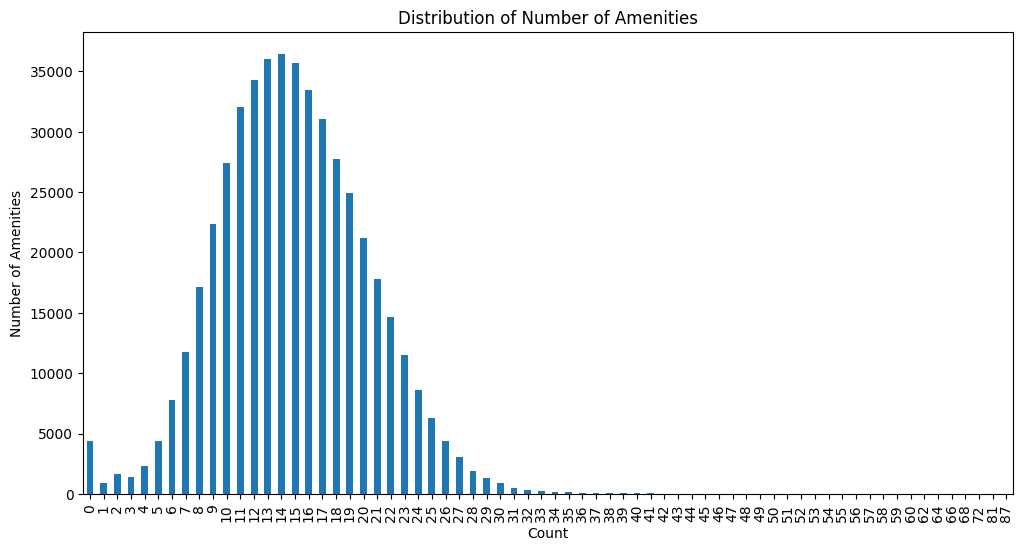

In [1210]:
column = "Number of Amenities"
plt.figure(figsize=(12, 6))
dataset[column].value_counts(dropna=False).sort_index().plot(kind='bar')
plt.title(f'Distribution of {column}')
plt.xlabel('Count')
plt.ylabel(column)
plt.show()

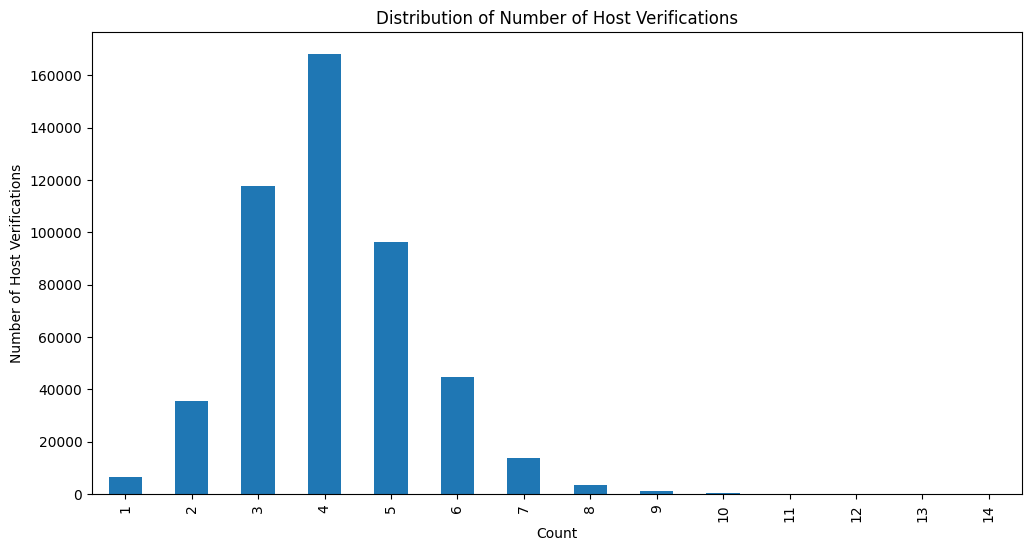

In [1211]:
column = "Number of Host Verifications"
plt.figure(figsize=(12, 6))
dataset[column].value_counts(dropna=False).sort_index().plot(kind='bar')
plt.title(f'Distribution of {column}')
plt.xlabel('Count')
plt.ylabel(column)
plt.show()

##### 2.5.2.2 Feature Scaling

There are two commonly used methods for rescaling data: normalization and standardization:
- ``Normalization`` scales all numeric variables between 0 and 1. However, this can lead to the loss of information from outliers, which is often undesirable.
- ``Standardization`` transforms the data to have a zero mean and a variance of 1.

It's important to note that standardizing the target variable is not necessary.

In the presence of outliers, the use of RobustScaler from Scikit-learn is recommended because it is resilient to the impact of outliers. This is particularly relevant in cases where there are numerous (albeit not real) outliers.

Standardizing data is a crucial step in the data preprocessing process. It aims to scale variables to a common range, facilitating comparison and utilization in machine learning models.

Here, we will scale only numerical features of the independant features and not categorical features because we plan to encode them in the next part.

In [1212]:
X = dataset.drop(columns=dependant_variables)
y = dataset[dependant_variables]

In [1213]:
dataset.head(1)

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Days Since Hosting,Number of Amenities,Number of Host Verifications
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6017649,none,within an hour,100.0,1.0,1.0,"email,phone,facebook,reviews",52.359927,4.86286,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Heating,Was...",50.0,350.0,1525.0,40.0,1.0,0.0,1.0,1125.0,671,0.0,0.0,0.0,0.0,3.0,90.0,10.0,9.0,10.0,9.0,9.0,9.0,flexible,1.0,0.13,2092,6,4


In [1214]:
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

In [1215]:
scaler = RobustScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [1216]:
X[numeric_columns] = X_numeric_scaled
dataset = pd.concat([X, y], axis=1)

In [1217]:
dataset.head(1)

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Days Since Hosting,Number of Amenities,Number of Host Verifications,Price,Weekly Price,Monthly Price
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6017649,none,within an hour,0.0,0.0,0.0,"email,phone,facebook,reviews",0.843511,0.055545,Apartment,Private room,-0.5,0.0,0.0,0.0,Real Bed,"Internet,Wireless Internet,Kitchen,Heating,Was...",0.0,0.0,0.0,-0.5,0.0,10.95,-0.263158,-0.386364,-0.464789,-0.498328,-0.058824,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,flexible,0.0,-0.231788,1.274397,-1.285714,0.0,50.0,350.0,1525.0


We can now observe a transformation in the scale of the values. This ensures that our data is now on a comparable scale, a crucial step in preparing it for further  modeling.

##### 2.5.2.3 Encoding Categorical Variables
We just need to encode our categorical variables to conclude this crucial step, which is the preparation of our data

The encoding of categorical variables is essential in the data preprocessing process as it allows the representation of qualitative information in a numerical form. This is crucial for machine learning algorithms that require numerical data. 

Here, we will use 3 kinds of encoder : One Hot Encoder (OHE), Dummy Encoder (DE, a specific type of OHE), and Ordinal Encoder (OE).

To remind, the variables to be encoded are: 
- ``Host Verifications`` : OHE
- ``Amenities`` : OHE
- ``Property Type`` : DE
- ``Room Type`` : DE
- ``Bed Type`` : DE
- ``Experiences Offered`` : DE
- ``Cancellation Policy`` : DE
- ``Host Response Time`` : OE

I will justify the use of each encoder for each feature later.

###### 2.5.2.3.1 Ordinal Encoding

The ordinal encoding is used to convert variables representing categories with an order into a numerical variable while preserving the relative order among them.

Let's take the example of ``Host Response Time``.

In [1218]:
dataset['Host Response Time'].unique()

array(['within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

Here, we can observe that the values taken by the ``Host Response Time`` feature can be ordered as follows:
- Within an hour -> within a few hours -> within a day -> a few days or more

There is a clear temporality. We can encode this data as follows to preserve this order:
- Within an hour: 0
- Within a few hours: 1
- Within a day: 2
- A few days or more: 3

This implies that the longer the time the host takes to respond, the higher the encoded value would be, reflecting its importance.

Let's encode them !

In [1219]:
oe_encoder = OrdinalEncoder(categories= [['within an hour', 'within a few hours', 'within a day', 'a few days or more']])

In [1220]:
dataset['Host Response Time'] = oe_encoder.fit_transform(dataset[['Host Response Time']])

We can now check, the new values given to the ``Host Response Time``. To check to encoding.

In [1221]:
dataset['Host Response Time'].unique()

array([0., 1., 2., 3.])

We can check the associate values using the following instruction :

In [1222]:
oe_encoder.categories_

[array(['within an hour', 'within a few hours', 'within a day',
        'a few days or more'], dtype=object)]

But why did I decided not to use this kind of encoding for the ``Cancellation Policy`` ?

In [1223]:
dataset['Cancellation Policy'].unique()

array(['flexible', 'moderate', 'strict', 'super_strict', 'no_refunds',
       'long_term'], dtype=object)

I didn't opte the use of ordinal encoding for the ``Cancellation Policy`` because this specific feature doesn't exhibit a clear ordinal relationship among its categories. 

Of course, we have a hierarchy among the values: 'flexible' > 'moderate' > 'strict' > 'super_strict'. However, there is ambiguity with 'no_refunds' and 'long_term'. We do not know if these values are stricter or less strict than the others. The hierarchy is not clear

Instead, to avoid any ambiguity, I chosed to use another encoding method : the dummy encoding.

###### 2.5.2.3.2 One Hot Encoding
The One-Hot Encoder is also used to convert categorical variables into numeric variables, but this time not in the form of a single numeric variable for the entire set, but rather a numeric variable for each value taken by the feature.

This method assigns a distinct binary column to each category, indicating the presence(1) or absence (0) of that category for each observation.

This is particularly useful when categories do not have an order. However, be carefull with variables that have a significant number of different categories, this is our case for ``Amenities`` and ``Host Verifications``.

It's important to note that these two columns have a specific formatting where each real categories are separated by commas, reducing the number of dimensions to be added. That's why we won't directly use a One-Hot Encoder on these two variables but create our own encoder.

Here, we will proceed with a specific One-Hot Encoding by encoding ``Amenities`` and ``Host Verifications`` in the manner of a One-Hot Encoder, but only for the subcategories that repeat the most, as we observed during the analysis phase:
- The top 27 categories that appear most frequently for ``Amenities``
- The top 5 categories that appear most frequently for ``Host Verification``

I have decided to use a modified One-Hot Encoder instead of a binary encoder because it allows for easy interpretation of our data and because we do not want ordinal encoding here.

Let's establish two functions for implementing this specific encoding:
- value_contains_category : this function determines whether a value in an observation contains a specific category or not.
- custom_one_hot_encoding : this function applies the value_contains_category function for each category to be encoded and for each observation.

In [1224]:
def value_contain_category(x, category):
    if category in x:
        return 1
    return 0

In [1225]:
def custom_one_hot_encoding(data, column_name, top_categories):
    for category in top_categories:
        data[f'{column_name}_{category}'] = data[column_name].apply(value_contain_category, category=category)
    data.drop([column_name], axis=1, inplace=True)

Let's first focus on encoding Amenities !

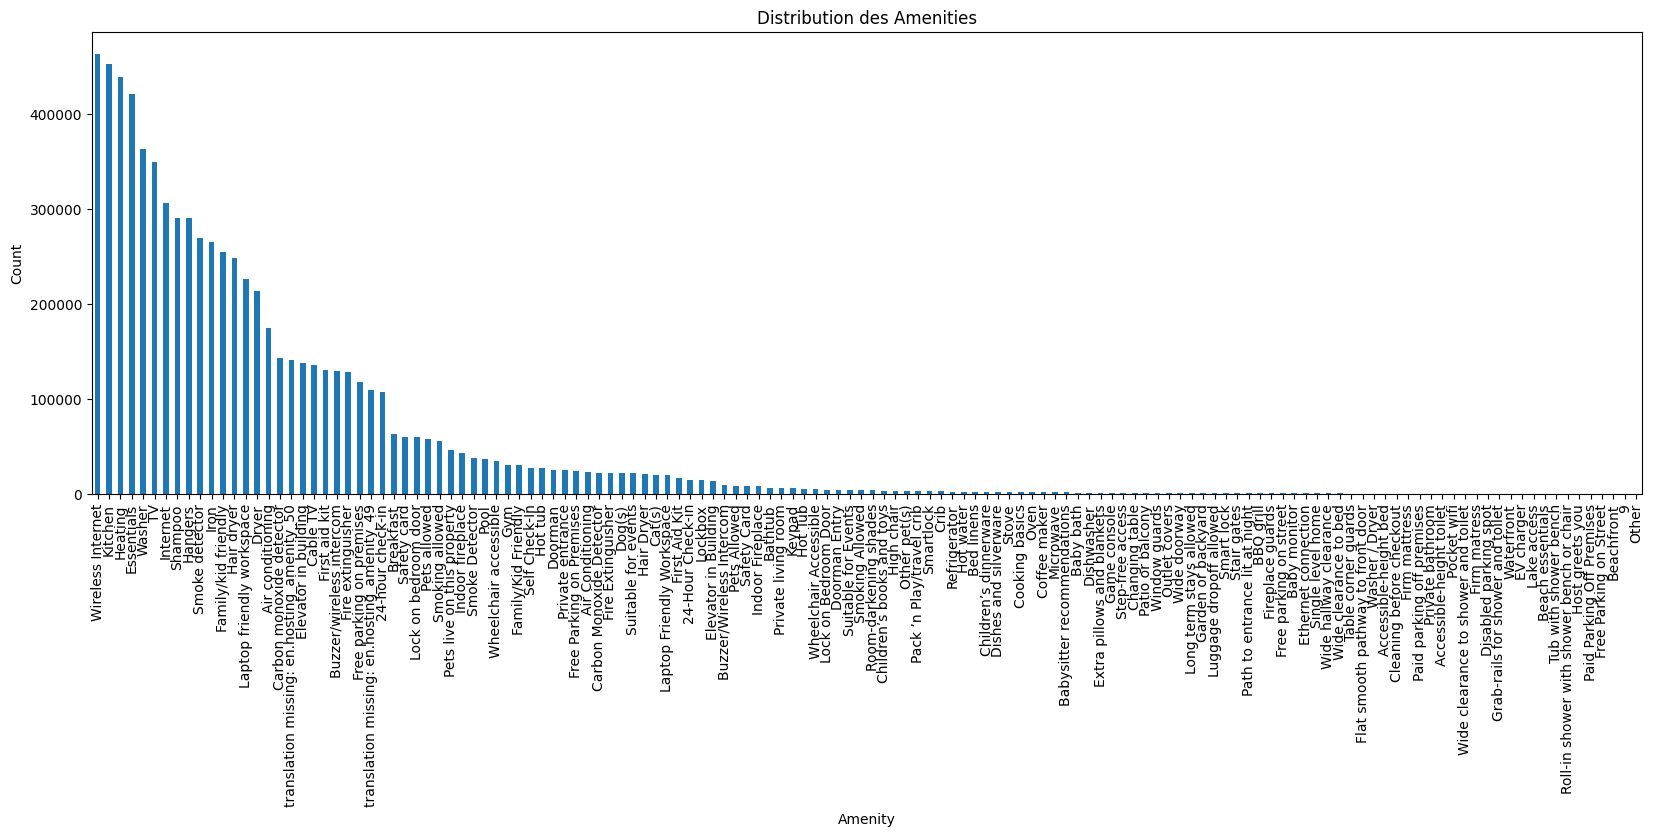

In [1226]:
plt.figure(figsize=(20, 6))
amenity_counts.plot(kind='bar')
plt.title('Distribution des Amenities')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.show()

But how do we retrieve the 27 most frequent amenities? 

We will reuse code that has already been written for visualization.

In [1227]:
NUMBER_AMENITIES_TO_KEEP = 27
top_amenety_to_encode = amenity_counts.head(NUMBER_AMENITIES_TO_KEEP).index.tolist()

We can now use the function to perform the specific encoding with 

In [1228]:
custom_one_hot_encoding(dataset, 'Amenities', top_amenety_to_encode)

In [1229]:
dataset.head(1)

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Days Since Hosting,Number of Amenities,Number of Host Verifications,Price,Weekly Price,Monthly Price,Amenities_Wireless Internet,Amenities_Kitchen,Amenities_Heating,Amenities_Essentials,Amenities_Washer,Amenities_TV,Amenities_Internet,Amenities_Shampoo,Amenities_Hangers,Amenities_Smoke detector,Amenities_Iron,Amenities_Family/kid friendly,Amenities_Hair dryer,Amenities_Laptop friendly workspace,Amenities_Dryer,Amenities_Air conditioning,Amenities_Carbon monoxide detector,Amenities_translation missing: en.hosting_amenity_50,Amenities_Elevator in building,Amenities_Cable TV,Amenities_First aid kit,Amenities_Buzzer/wireless intercom,Amenities_Fire extinguisher,Amenities_Free parking on premises,Amenities_translation missing: en.hosting_amenity_49,Amenities_24-hour check-in,Amenities_Breakfast
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6017649,none,0.0,0.0,0.0,0.0,"email,phone,facebook,reviews",0.843511,0.055545,Apartment,Private room,-0.5,0.0,0.0,0.0,Real Bed,0.0,0.0,0.0,-0.5,0.0,10.95,-0.263158,-0.386364,-0.464789,-0.498328,-0.058824,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,flexible,0.0,-0.231788,1.274397,-1.285714,0.0,50.0,350.0,1525.0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Here, we can observe that the original 'amenities' feature has the value of "Internet, Wireless Internet, Kitchen, Heating, Washer, Essentials," and that these have been encoded as intended, with 0 in attributes that the accommodation doesn't have.

Let's do the same fr ``Host Verifications``

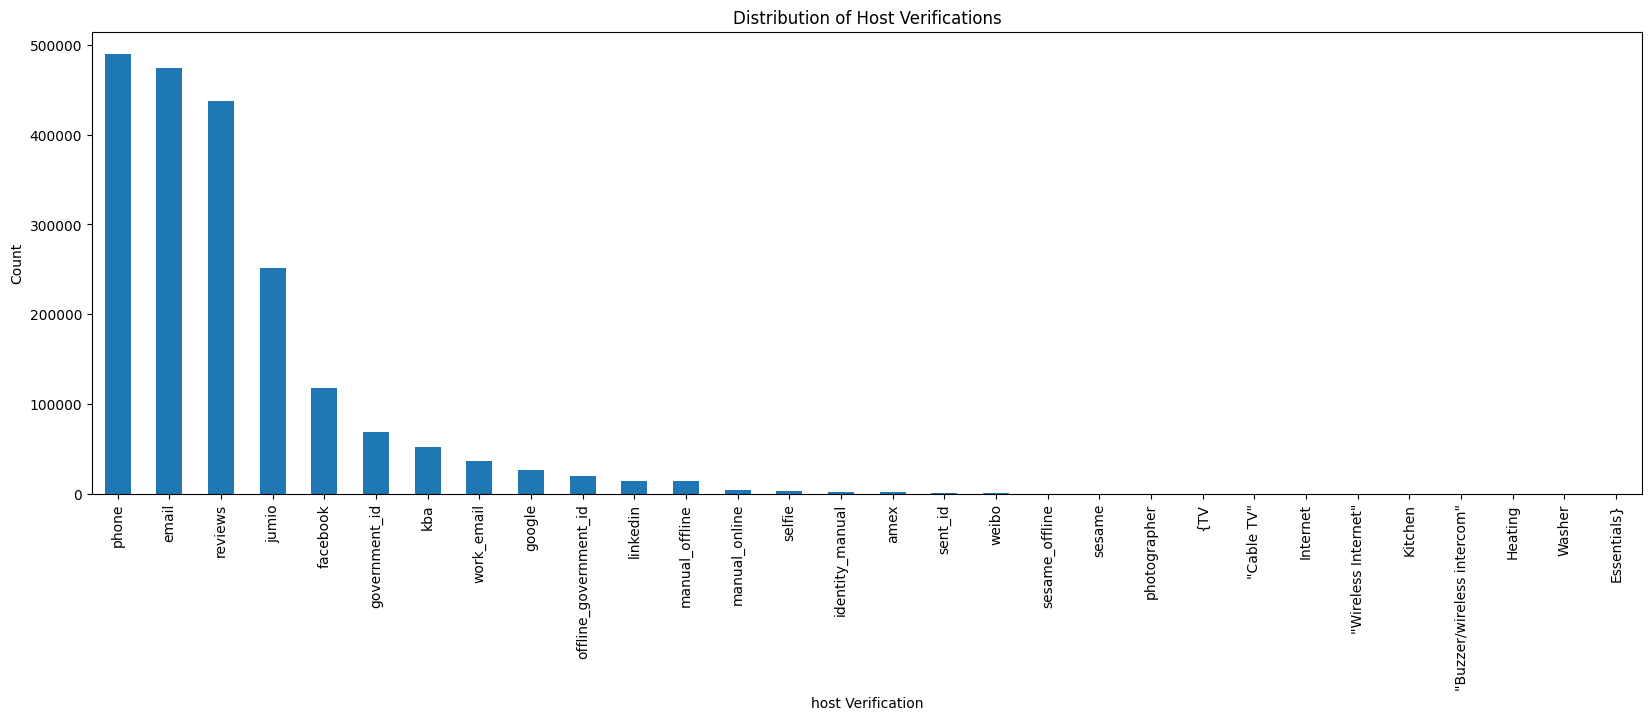

In [1230]:
plt.figure(figsize=(20, 6))
host_verification_counts.plot(kind='bar')
plt.title('Distribution of Host Verifications')
plt.xlabel('host Verification')
plt.ylabel('Count')
plt.show()

In [1231]:
NUMBER_HOST_VERIFICATION_TO_KEEP = 5
top_host_verifications_to_encode = host_verification_counts.head(NUMBER_HOST_VERIFICATION_TO_KEEP).index.tolist()

In [1232]:
custom_one_hot_encoding(dataset, 'Host Verifications', top_host_verifications_to_encode)

In [1233]:
dataset.head(1)

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Days Since Hosting,Number of Amenities,Number of Host Verifications,Price,Weekly Price,Monthly Price,Amenities_Wireless Internet,Amenities_Kitchen,Amenities_Heating,Amenities_Essentials,Amenities_Washer,Amenities_TV,Amenities_Internet,Amenities_Shampoo,Amenities_Hangers,Amenities_Smoke detector,Amenities_Iron,Amenities_Family/kid friendly,Amenities_Hair dryer,Amenities_Laptop friendly workspace,Amenities_Dryer,Amenities_Air conditioning,Amenities_Carbon monoxide detector,Amenities_translation missing: en.hosting_amenity_50,Amenities_Elevator in building,Amenities_Cable TV,Amenities_First aid kit,Amenities_Buzzer/wireless intercom,Amenities_Fire extinguisher,Amenities_Free parking on premises,Amenities_translation missing: en.hosting_amenity_49,Amenities_24-hour check-in,Amenities_Breakfast,Host Verifications_phone,Host Verifications_email,Host Verifications_reviews,Host Verifications_jumio,Host Verifications_facebook
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6017649,none,0.0,0.0,0.0,0.0,0.843511,0.055545,Apartment,Private room,-0.5,0.0,0.0,0.0,Real Bed,0.0,0.0,0.0,-0.5,0.0,10.95,-0.263158,-0.386364,-0.464789,-0.498328,-0.058824,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,flexible,0.0,-0.231788,1.274397,-1.285714,0.0,50.0,350.0,1525.0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1


Excellent, we have successfully completed our encoding of ``Amenities`` and ``Host Verifications``. These wasn't an easy task.

###### 2.5.2.3.3 Dummy Encoding
The Dummy Encoder is a specific kind of One-Hot Encoder, but unlike the latter, it creates one less column than an OHE. There is one category that does not have a dedicated column.

For example, if we take a variable 'Property Type' with 4 values 'House', 'Apartment', 'Hostel' and 'Other'. If an observation has 0 in the 'House', 'Apartment' and 'Hostel' columns, it means the property type is 'Other'.

Now, let's encode the following variables using a Dummy Encoder:
- ``Property Type`` 
- ``Room Type`` 
- ``Bed Type`` 
- ``Experiences Offered`` 
- ``Cancellation Policy`` 

This method assumes that these attributes have one category of them. This was not necessarily the case for ``Amenities`` and ``Host Verifications``, which could very well have no values, or another values.

The variables we need to encode here don't have a hierarchical order between the categoricals and each observation has an unique value. Their unique values are displayed below the following cell.

In [1234]:
for col_name in ['Property Type', 'Room Type', 'Bed Type', 'Experiences Offered', 'Cancellation Policy']:
    print('Unique Values of ', col_name, ':\n', dataset[col_name].unique())
    dummy_encoded = pd.get_dummies(dataset[col_name], prefix=col_name, dtype=int)
    dataset = pd.concat([dataset, dummy_encoded], axis=1)
    dataset.drop([col_name], axis=1, inplace=True)


Unique Values of  Property Type :
 ['Apartment' 'Hostel' 'House' 'Other']


Unique Values of  Room Type :
 ['Private room' 'Entire home/apt' 'Shared room']
Unique Values of  Bed Type :
 ['Real Bed' 'Pull-out Sofa' 'Airbed' 'Futon' 'Couch']
Unique Values of  Experiences Offered :
 ['none' 'business' 'social' 'romantic' 'family']
Unique Values of  Cancellation Policy :
 ['flexible' 'moderate' 'strict' 'super_strict' 'no_refunds' 'long_term']


In [1235]:
dataset.head(1)

,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Days Since Hosting,Number of Amenities,Number of Host Verifications,Price,Weekly Price,Monthly Price,Amenities_Wireless Internet,Amenities_Kitchen,Amenities_Heating,Amenities_Essentials,Amenities_Washer,Amenities_TV,Amenities_Internet,Amenities_Shampoo,Amenities_Hangers,Amenities_Smoke detector,Amenities_Iron,Amenities_Family/kid friendly,Amenities_Hair dryer,Amenities_Laptop friendly workspace,Amenities_Dryer,Amenities_Air conditioning,Amenities_Carbon monoxide detector,Amenities_translation missing: en.hosting_amenity_50,Amenities_Elevator in building,Amenities_Cable TV,Amenities_First aid kit,Amenities_Buzzer/wireless intercom,Amenities_Fire extinguisher,Amenities_Free parking on premises,Amenities_translation missing: en.hosting_amenity_49,Amenities_24-hour check-in,Amenities_Breakfast,Host Verifications_phone,Host Verifications_email,Host Verifications_reviews,Host Verifications_jumio,Host Verifications_facebook,Property Type_Apartment,Property Type_Hostel,Property Type_House,Property Type_Other,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Experiences Offered_business,Experiences Offered_family,Experiences Offered_none,Experiences Offered_romantic,Experiences Offered_social,Cancellation Policy_flexible,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6017649,0.0,0.0,0.0,0.0,0.843511,0.055545,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,10.95,-0.263158,-0.386364,-0.464789,-0.498328,-0.058824,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-0.231788,1.274397,-1.285714,0.0,50.0,350.0,1525.0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


We have finally finished preparing our data!!!

### 2.6 Data Splitting (Train-Test-Validation)

## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

### 3.2 Bivariate Analysis
#### 3.2.1 Numerical-Numerical Variable

#### 3.2.2 Categorical-Numerical Variable

## 4. The model
### 4.1 Model Building

### 4.2 Model Training

### 4.3 Model Evaluation
#### 4.3.1 K-Fold Cross Validation

#### 4.3.2 Hyperparameter Tunning

#### 4.3.3 Re-train with optimal hyperparameters for predictions

#### 4.3.4 Feature Importance

#### 4.3.5 Learning Curves

### 4.4 Test the model on Test Set

## 5. Conclusion
### 5.1 Results of the project / Validating hypothesis
...
### 5.2 Improvements
...
### 5.3 Conclusion on the project / course
...